In [1]:
import pandas as pd
import numpy as np
import sklearn 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from unipath import Path

#date libraries
from dateutil import parser
from datetime import datetime, timedelta, date
import holidays

#prophet library
from prophet import Prophet
from prophet.diagnostics import performance_metrics
from prophet.plot import plot_cross_validation_metric
from prophet.diagnostics import cross_validation


from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report

from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
import math
import sklearn.metrics as metrics

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import math
import sklearn.metrics as metrics

# Import statsmodel
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.tsa.stattools import adfuller

import itertools 


In [2]:
def mape(actual, pred): 
    '''
    Mean Absolute Percentage Error (MAPE) Function
    
    input: list/series for actual values and predicted values
    output: mape value 
    '''
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100

In [3]:
def RMSE(predicted, actual):
    mse = (predicted - actual)**2
    rmse = np.sqrt(mse.sum()/mse.count())
    return rmse

In [4]:
rutabase = Path('/Users/ronaldverdugol/Desktop/Magister/6to/')

In [5]:
df = pd.concat(
    map(pd.read_csv, [rutabase +'1.csv', rutabase +'2.csv', rutabase +'3.csv']), ignore_index=True)
df.shape 

(90166, 34)

In [6]:
df.isnull().sum()

FECHA_VENTA               0
FECHACREACION             0
DESCRIPCION               0
CATEG_ID                  0
item_nbr                  0
item_desc_1               0
UNIDADES_VEND             0
MONTO_VENTA               0
TOTAL                  4017
INSTOCK                4017
QTY_ITEM_SUBCAT           0
MAXSHELF                228
CAPACIDAD_ESTANTE       228
EXISTENCIA               20
QUIEBRE_STOCK             0
BIN_QTY                   0
REPONER_QUIEBRE           0
LLENAR_GONDOLA            0
PISOVENTA                20
BACKROOM                 20
BIN_INCONSISTENCIAS       0
COM_BINS                  0
WHPK_QTY                228
QUIEBRE_COMP           5881
SALES_L3W                18
venta_quiebres            3
venta_llenado             0
venta_oostock             0
QUIEBRES_OPERACION        0
QUIEBRES_SUPPLY           0
QUIEBRES_COMERCIAL        0
QUIEBRES_OTROS            0
NUMERADOR_NSG             0
DENOMINADOR_NSG        2181
dtype: int64

In [7]:
df = df.drop(['QTY_ITEM_SUBCAT', 'TOTAL', 'QUIEBRE_COMP'], axis =1)

In [8]:
na_ratio = ((df.isnull().sum() / len(df))*100).sort_values(ascending = False)
print(na_ratio)

INSTOCK                4.455116
DENOMINADOR_NSG        2.418872
WHPK_QTY               0.252867
CAPACIDAD_ESTANTE      0.252867
MAXSHELF               0.252867
EXISTENCIA             0.022181
PISOVENTA              0.022181
BACKROOM               0.022181
SALES_L3W              0.019963
venta_quiebres         0.003327
QUIEBRES_SUPPLY        0.000000
QUIEBRES_OPERACION     0.000000
venta_oostock          0.000000
QUIEBRES_COMERCIAL     0.000000
COM_BINS               0.000000
QUIEBRES_OTROS         0.000000
venta_llenado          0.000000
NUMERADOR_NSG          0.000000
FECHA_VENTA            0.000000
BIN_INCONSISTENCIAS    0.000000
FECHACREACION          0.000000
REPONER_QUIEBRE        0.000000
BIN_QTY                0.000000
QUIEBRE_STOCK          0.000000
MONTO_VENTA            0.000000
UNIDADES_VEND          0.000000
item_desc_1            0.000000
item_nbr               0.000000
CATEG_ID               0.000000
DESCRIPCION            0.000000
LLENAR_GONDOLA         0.000000
dtype: f

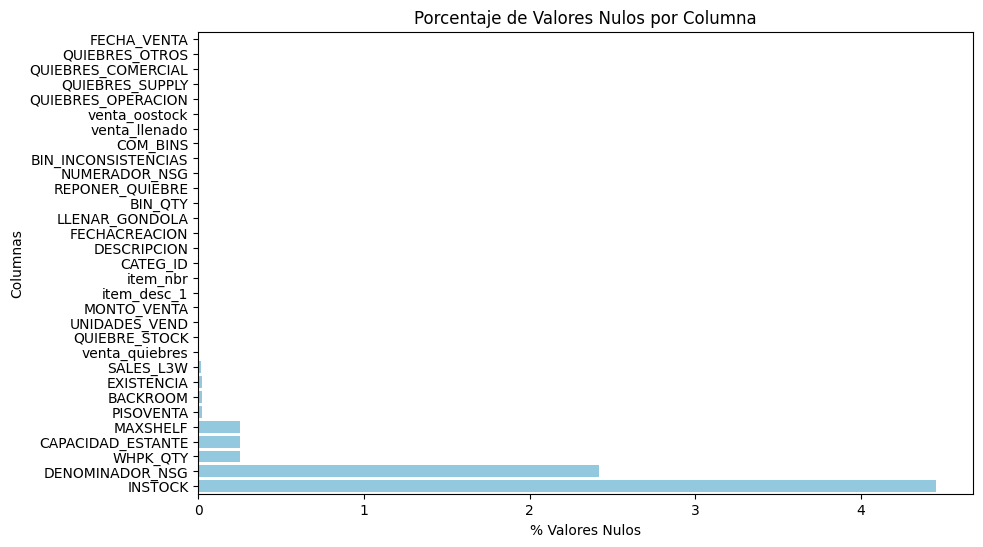

In [9]:
# Crear un DataFrame de ejemplo con valores nulos

# Calcular porcentajes de valores nulos por columna
porcentajes_nulos = df.isnull().mean() * 100
porcentajes_nulos = porcentajes_nulos.sort_values(ascending = True)
# Crear el gráfico de barras horizontales
plt.figure(figsize=(10, 6))
sns.barplot(x=porcentajes_nulos, y=porcentajes_nulos.index, color='skyblue')

# Añadir etiquetas y título
plt.xlabel('% Valores Nulos')
plt.ylabel('Columnas')
plt.title('Porcentaje de Valores Nulos por Columna')

# Mostrar el gráfico
plt.show()

In [10]:
df.shape

(90166, 31)

In [11]:
df = df.dropna(how='all', axis = 1)

In [12]:
df.dtypes

FECHA_VENTA             object
FECHACREACION           object
DESCRIPCION             object
CATEG_ID                object
item_nbr                 int64
item_desc_1             object
UNIDADES_VEND            int64
MONTO_VENTA              int64
INSTOCK                float64
MAXSHELF               float64
CAPACIDAD_ESTANTE      float64
EXISTENCIA             float64
QUIEBRE_STOCK            int64
BIN_QTY                  int64
REPONER_QUIEBRE        float64
LLENAR_GONDOLA         float64
PISOVENTA              float64
BACKROOM               float64
BIN_INCONSISTENCIAS      int64
COM_BINS                 int64
WHPK_QTY               float64
SALES_L3W              float64
venta_quiebres         float64
venta_llenado            int64
venta_oostock            int64
QUIEBRES_OPERACION       int64
QUIEBRES_SUPPLY          int64
QUIEBRES_COMERCIAL       int64
QUIEBRES_OTROS           int64
NUMERADOR_NSG            int64
DENOMINADOR_NSG        float64
dtype: object

In [13]:
df['INSTOCK'].describe()

count    86149.000000
mean         0.985873
std          0.118014
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: INSTOCK, dtype: float64

In [14]:
df.sort_values(by=['FECHA_VENTA', 'item_nbr'], inplace=True)

# Llenar los valores nulos en la columna Instock con el valor del día anterior para ese producto
df.fillna(method='ffill', inplace=True)

# Manejar los casos donde no hay valor anterior disponible
# Suponiendo que si no hay un valor anterior, se debe establecer en False
df.fillna(False, inplace=True)


In [15]:
df.sort_values(by=['FECHA_VENTA', 'item_nbr'], inplace=True)

# Llenar los valores nulos en la columna Instock con el valor del día anterior para ese producto
df['INSTOCK'].fillna(method='ffill', inplace=True)

# Manejar los casos donde no hay valor anterior disponible
# Suponiendo que si no hay un valor anterior, se debe establecer en False
df['INSTOCK'].fillna(False, inplace=True)


In [16]:
df['DENOMINADOR_NSG'].describe()

count    90166.0
mean         1.0
std          0.0
min          1.0
25%          1.0
50%          1.0
75%          1.0
max          1.0
Name: DENOMINADOR_NSG, dtype: float64

In [17]:
df.sort_values(by=['FECHA_VENTA', 'item_nbr'], inplace=True)

# Llenar los valores nulos en la columna Instock con el valor del día anterior para ese producto
df['DENOMINADOR_NSG'].fillna(method='ffill', inplace=True)

# Manejar los casos donde no hay valor anterior disponible
# Suponiendo que si no hay un valor anterior, se debe establecer en False
df['DENOMINADOR_NSG'].fillna(False, inplace=True)


In [18]:
df['DENOMINADOR_NSG'].describe()

count    90166.0
mean         1.0
std          0.0
min          1.0
25%          1.0
50%          1.0
75%          1.0
max          1.0
Name: DENOMINADOR_NSG, dtype: float64

In [19]:
df.rename(columns = {'FECHA_VENTA':'DATE'}, inplace = True)

# Cambiamos el formado de la columna 'date'
df.DATE= pd.DatetimeIndex(df.DATE)
df['DATE'].dtype
# es equivalente a datetime64

dtype('<M8[ns]')

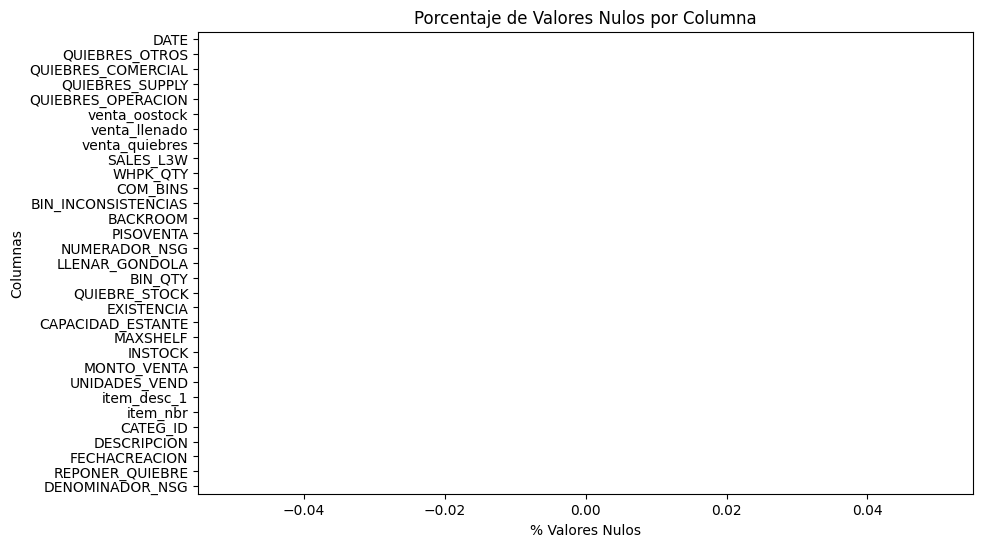

In [20]:
# Crear un DataFrame de ejemplo con valores nulos

# Calcular porcentajes de valores nulos por columna
porcentajes_nulos = df.isnull().mean() * 100
porcentajes_nulos = porcentajes_nulos.sort_values(ascending = True)
# Crear el gráfico de barras horizontales
plt.figure(figsize=(10, 6))
sns.barplot(x=porcentajes_nulos, y=porcentajes_nulos.index, color='skyblue')

# Añadir etiquetas y título
plt.xlabel('% Valores Nulos')
plt.ylabel('Columnas')
plt.title('Porcentaje de Valores Nulos por Columna')

# Mostrar el gráfico
plt.show()

In [21]:
df.head()

DATE FECHACREACION                         DESCRIPCION CATEG_ID  \
17 2022-04-06    2022-04-05  QUESOS AUTOSERVICIO - QUESO MADURO  SC18979   
22 2022-04-06    2022-04-05  QUESOS AUTOSERVICIO - QUESO MADURO  SC18979   
31 2022-04-06    2022-04-05  QUESOS AUTOSERVICIO - QUESO MADURO  SC18979   
60 2022-04-06    2022-04-05  QUESOS AUTOSERVICIO - QUESO MADURO  SC18979   
49 2022-04-06    2022-04-05  QUESOS AUTOSERVICIO - QUESO MADURO  SC18979   

    item_nbr           item_desc_1  UNIDADES_VEND  MONTO_VENTA  INSTOCK  \
17    240159     QUESO RALLADO 80G             43        47122      1.0   
22    254100  QUESO GOUDA LAMINADO             58       173622      1.0   
31    254112  QUESO GOUDA LAMINADO              5         8723      1.0   
60    254124  QUESO GOUDA LAMINADO              9         8890      1.0   
49    263719         QUESO RALLADO             74        41780      1.0   

    MAXSHELF  ...  SALES_L3W  venta_quiebres  venta_llenado  venta_oostock  \
17       8.0  ...   668087.0             0.0              0              0   
22      81.0  ...  3481916.0             0.0              0              0   
31      72.0  ...   191424.0             0.0              0              0   
60     112.0  ...   143659.0             0.0              0              0   
49    1440.0  ...   584836.0             0.0              0              0   

    QUIEBRES_OPERACION  QUIEBRES_SUPPLY  QUIEBRES_COMERCIAL  QUIEBRES_OTROS  \
17                   0                0                   1               0   
22                   1                0                   0               0   
31                   0                0                   0               0   
60                   0                0                   0               0   
49                   0                0                   0               0   

    NUMERADOR_NSG  DENOMINADOR_NSG  
17              1              1.0  
22              1              1.0  
31              0              1.0  
60              0              1.0  
49              0              1.0  

[5 rows x 31 columns]

In [22]:
df.shape

(90166, 31)

In [23]:
# Podemos reindexar nuestro dataframe 
#df = df.sort_values(by = "DATE")
#df.index = pd.PeriodIndex(df.DATE, freq='D')
#df.head()

In [24]:
#df = df.dropna()

/var/folders/l_/_pmt0znn2bsg_f3mnw2xb1xh0000gn/T/ipykernel_71246/2362317380.py:2: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlaciones = df.drop('UNIDADES_VEND', axis=1).corrwith(df['UNIDADES_VEND'])


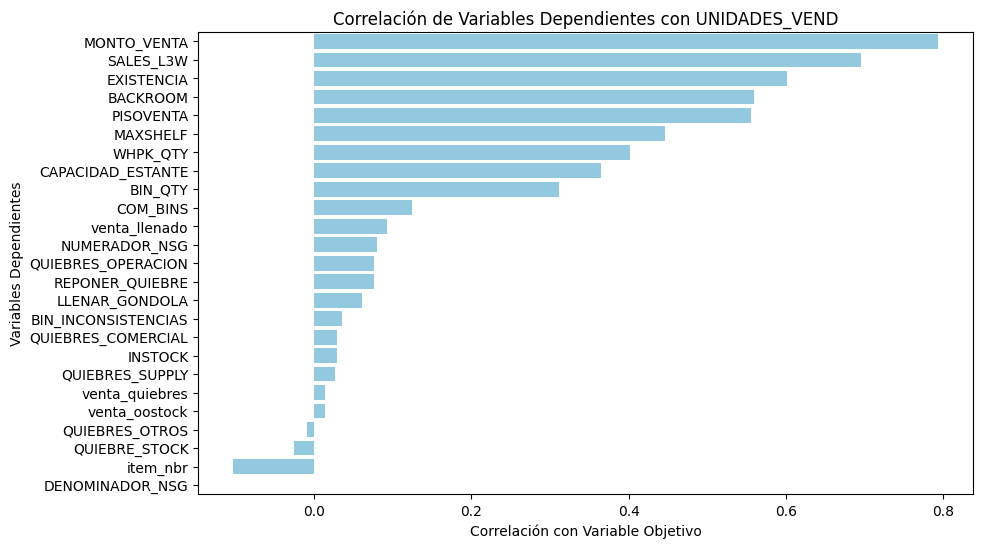

In [25]:
# Calcular la correlación de las variables dependientes con respecto a la variable objetivo
correlaciones = df.drop('UNIDADES_VEND', axis=1).corrwith(df['UNIDADES_VEND'])

# Ordenar las correlaciones de mayor a menor
correlaciones = correlaciones.sort_values(ascending=False)

# Crear el gráfico de barras horizontales
plt.figure(figsize=(10, 6))
sns.barplot(x=correlaciones, y=correlaciones.index, color='skyblue')

# Añadir etiquetas y título
plt.xlabel('Correlación con Variable Objetivo')
plt.ylabel('Variables Dependientes')
plt.title('Correlación de Variables Dependientes con UNIDADES_VEND')

# Mostrar el gráfico
plt.show()

In [26]:
df_bkp=df

In [27]:
df

DATE FECHACREACION                         DESCRIPCION CATEG_ID  \
17    2022-04-06    2022-04-05  QUESOS AUTOSERVICIO - QUESO MADURO  SC18979   
22    2022-04-06    2022-04-05  QUESOS AUTOSERVICIO - QUESO MADURO  SC18979   
31    2022-04-06    2022-04-05  QUESOS AUTOSERVICIO - QUESO MADURO  SC18979   
60    2022-04-06    2022-04-05  QUESOS AUTOSERVICIO - QUESO MADURO  SC18979   
49    2022-04-06    2022-04-05  QUESOS AUTOSERVICIO - QUESO MADURO  SC18979   
...          ...           ...                                 ...      ...   
90084 2023-12-31    2023-12-30  QUESOS AUTOSERVICIO - QUESO MADURO  SC18979   
90090 2023-12-31    2023-12-30  QUESOS AUTOSERVICIO - QUESO MADURO  SC18979   
90047 2023-12-31    2023-12-30  QUESOS AUTOSERVICIO - QUESO MADURO  SC18979   
90093 2023-12-31    2023-12-30  QUESOS AUTOSERVICIO - QUESO MADURO  SC18979   
90022 2023-12-31    2023-12-30  QUESOS AUTOSERVICIO - QUESO MADURO  SC18979   

       item_nbr           item_desc_1  UNIDADES_VEND  MONTO_VENTA  INSTOCK  \
17       240159     QUESO RALLADO 80G             43        47122      1.0   
22       254100  QUESO GOUDA LAMINADO             58       173622      1.0   
31       254112  QUESO GOUDA LAMINADO              5         8723      1.0   
60       254124  QUESO GOUDA LAMINADO              9         8890      1.0   
49       263719         QUESO RALLADO             74        41780      1.0   
...         ...                   ...            ...          ...      ...   
90084   5028517  TABLA QUESO PARRILLE              1         5958      1.0   
90090   5029865  QUESO MANTEC OREGANO              2         7378      1.0   
90047   5029866   QUESO MANTEC MERKEN              1         3689      1.0   
90093   5035128     QUESO GAUDA TROZO              5         9200      1.0   
90022   5042804  QUESO TROZO MANTECOS              8        40272      1.0   

       MAXSHELF  ...  SALES_L3W  venta_quiebres  venta_llenado  venta_oostock  \
17          8.0  ...   668087.0             0.0              0              0   
22         81.0  ...  3481916.0             0.0              0              0   
31         72.0  ...   191424.0             0.0              0              0   
60        112.0  ...   143659.0             0.0              0              0   
49       1440.0  ...   584836.0             0.0              0              0   
...         ...  ...        ...             ...            ...            ...   
90084      48.0  ...   165748.0             0.0              0              0   
90090      12.0  ...   101628.0             0.0              0              0   
90047      12.0  ...    33319.0             0.0              0              0   
90093       0.0  ...    25760.0             0.0              0              0   
90022      24.0  ...   452054.0             0.0              0              0   

       QUIEBRES_OPERACION  QUIEBRES_SUPPLY  QUIEBRES_COMERCIAL  \
17                      0                0                   1   
22                      1                0                   0   
31                      0                0                   0   
60                      0                0                   0   
49                      0                0                   0   
...                   ...              ...                 ...   
90084                   0                0                   0   
90090                   0                0                   0   
90047                   0                0                   0   
90093                   0                0                   0   
90022                   0                0                   0   

       QUIEBRES_OTROS  NUMERADOR_NSG  DENOMINADOR_NSG  
17                  0              1              1.0  
22                  0              1              1.0  
31                  0              0              1.0  
60                  0              0              1.0  
49                  0              0              1.0  
...               ...   

In [28]:
df_heat =df

/var/folders/l_/_pmt0znn2bsg_f3mnw2xb1xh0000gn/T/ipykernel_71246/2778871380.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_heat.corr())


<Axes: >

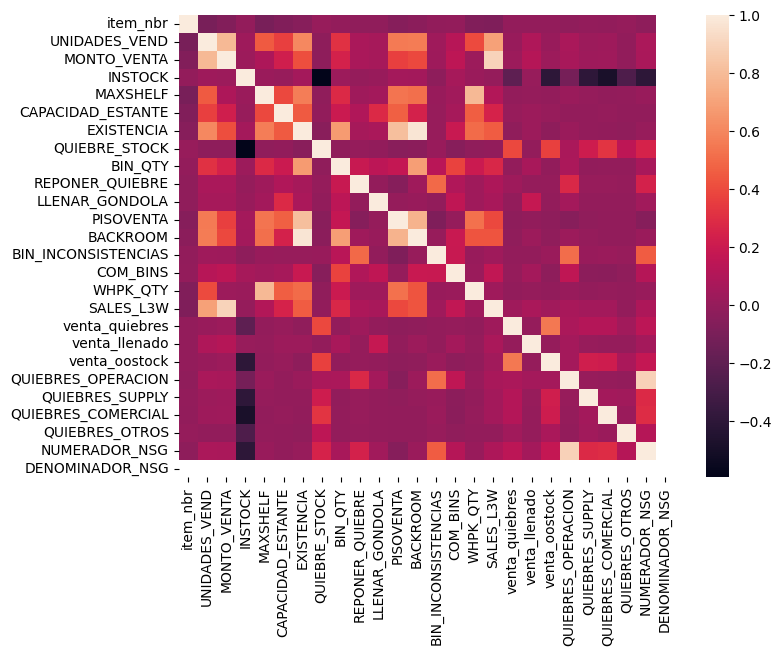

In [29]:
plt.figure(figsize=(8,6))
sns.heatmap(df_heat.corr())

In [30]:
df_heat

DATE FECHACREACION                         DESCRIPCION CATEG_ID  \
17    2022-04-06    2022-04-05  QUESOS AUTOSERVICIO - QUESO MADURO  SC18979   
22    2022-04-06    2022-04-05  QUESOS AUTOSERVICIO - QUESO MADURO  SC18979   
31    2022-04-06    2022-04-05  QUESOS AUTOSERVICIO - QUESO MADURO  SC18979   
60    2022-04-06    2022-04-05  QUESOS AUTOSERVICIO - QUESO MADURO  SC18979   
49    2022-04-06    2022-04-05  QUESOS AUTOSERVICIO - QUESO MADURO  SC18979   
...          ...           ...                                 ...      ...   
90084 2023-12-31    2023-12-30  QUESOS AUTOSERVICIO - QUESO MADURO  SC18979   
90090 2023-12-31    2023-12-30  QUESOS AUTOSERVICIO - QUESO MADURO  SC18979   
90047 2023-12-31    2023-12-30  QUESOS AUTOSERVICIO - QUESO MADURO  SC18979   
90093 2023-12-31    2023-12-30  QUESOS AUTOSERVICIO - QUESO MADURO  SC18979   
90022 2023-12-31    2023-12-30  QUESOS AUTOSERVICIO - QUESO MADURO  SC18979   

       item_nbr           item_desc_1  UNIDADES_VEND  MONTO_VENTA  INSTOCK  \
17       240159     QUESO RALLADO 80G             43        47122      1.0   
22       254100  QUESO GOUDA LAMINADO             58       173622      1.0   
31       254112  QUESO GOUDA LAMINADO              5         8723      1.0   
60       254124  QUESO GOUDA LAMINADO              9         8890      1.0   
49       263719         QUESO RALLADO             74        41780      1.0   
...         ...                   ...            ...          ...      ...   
90084   5028517  TABLA QUESO PARRILLE              1         5958      1.0   
90090   5029865  QUESO MANTEC OREGANO              2         7378      1.0   
90047   5029866   QUESO MANTEC MERKEN              1         3689      1.0   
90093   5035128     QUESO GAUDA TROZO              5         9200      1.0   
90022   5042804  QUESO TROZO MANTECOS              8        40272      1.0   

       MAXSHELF  ...  SALES_L3W  venta_quiebres  venta_llenado  venta_oostock  \
17          8.0  ...   668087.0             0.0              0              0   
22         81.0  ...  3481916.0             0.0              0              0   
31         72.0  ...   191424.0             0.0              0              0   
60        112.0  ...   143659.0             0.0              0              0   
49       1440.0  ...   584836.0             0.0              0              0   
...         ...  ...        ...             ...            ...            ...   
90084      48.0  ...   165748.0             0.0              0              0   
90090      12.0  ...   101628.0             0.0              0              0   
90047      12.0  ...    33319.0             0.0              0              0   
90093       0.0  ...    25760.0             0.0              0              0   
90022      24.0  ...   452054.0             0.0              0              0   

       QUIEBRES_OPERACION  QUIEBRES_SUPPLY  QUIEBRES_COMERCIAL  \
17                      0                0                   1   
22                      1                0                   0   
31                      0                0                   0   
60                      0                0                   0   
49                      0                0                   0   
...                   ...              ...                 ...   
90084                   0                0                   0   
90090                   0                0                   0   
90047                   0                0                   0   
90093                   0                0                   0   
90022                   0                0                   0   

       QUIEBRES_OTROS  NUMERADOR_NSG  DENOMINADOR_NSG  
17                  0              1              1.0  
22                  0              1              1.0  
31                  0              0              1.0  
60                  0              0              1.0  
49                  0              0              1.0  
...               ...   

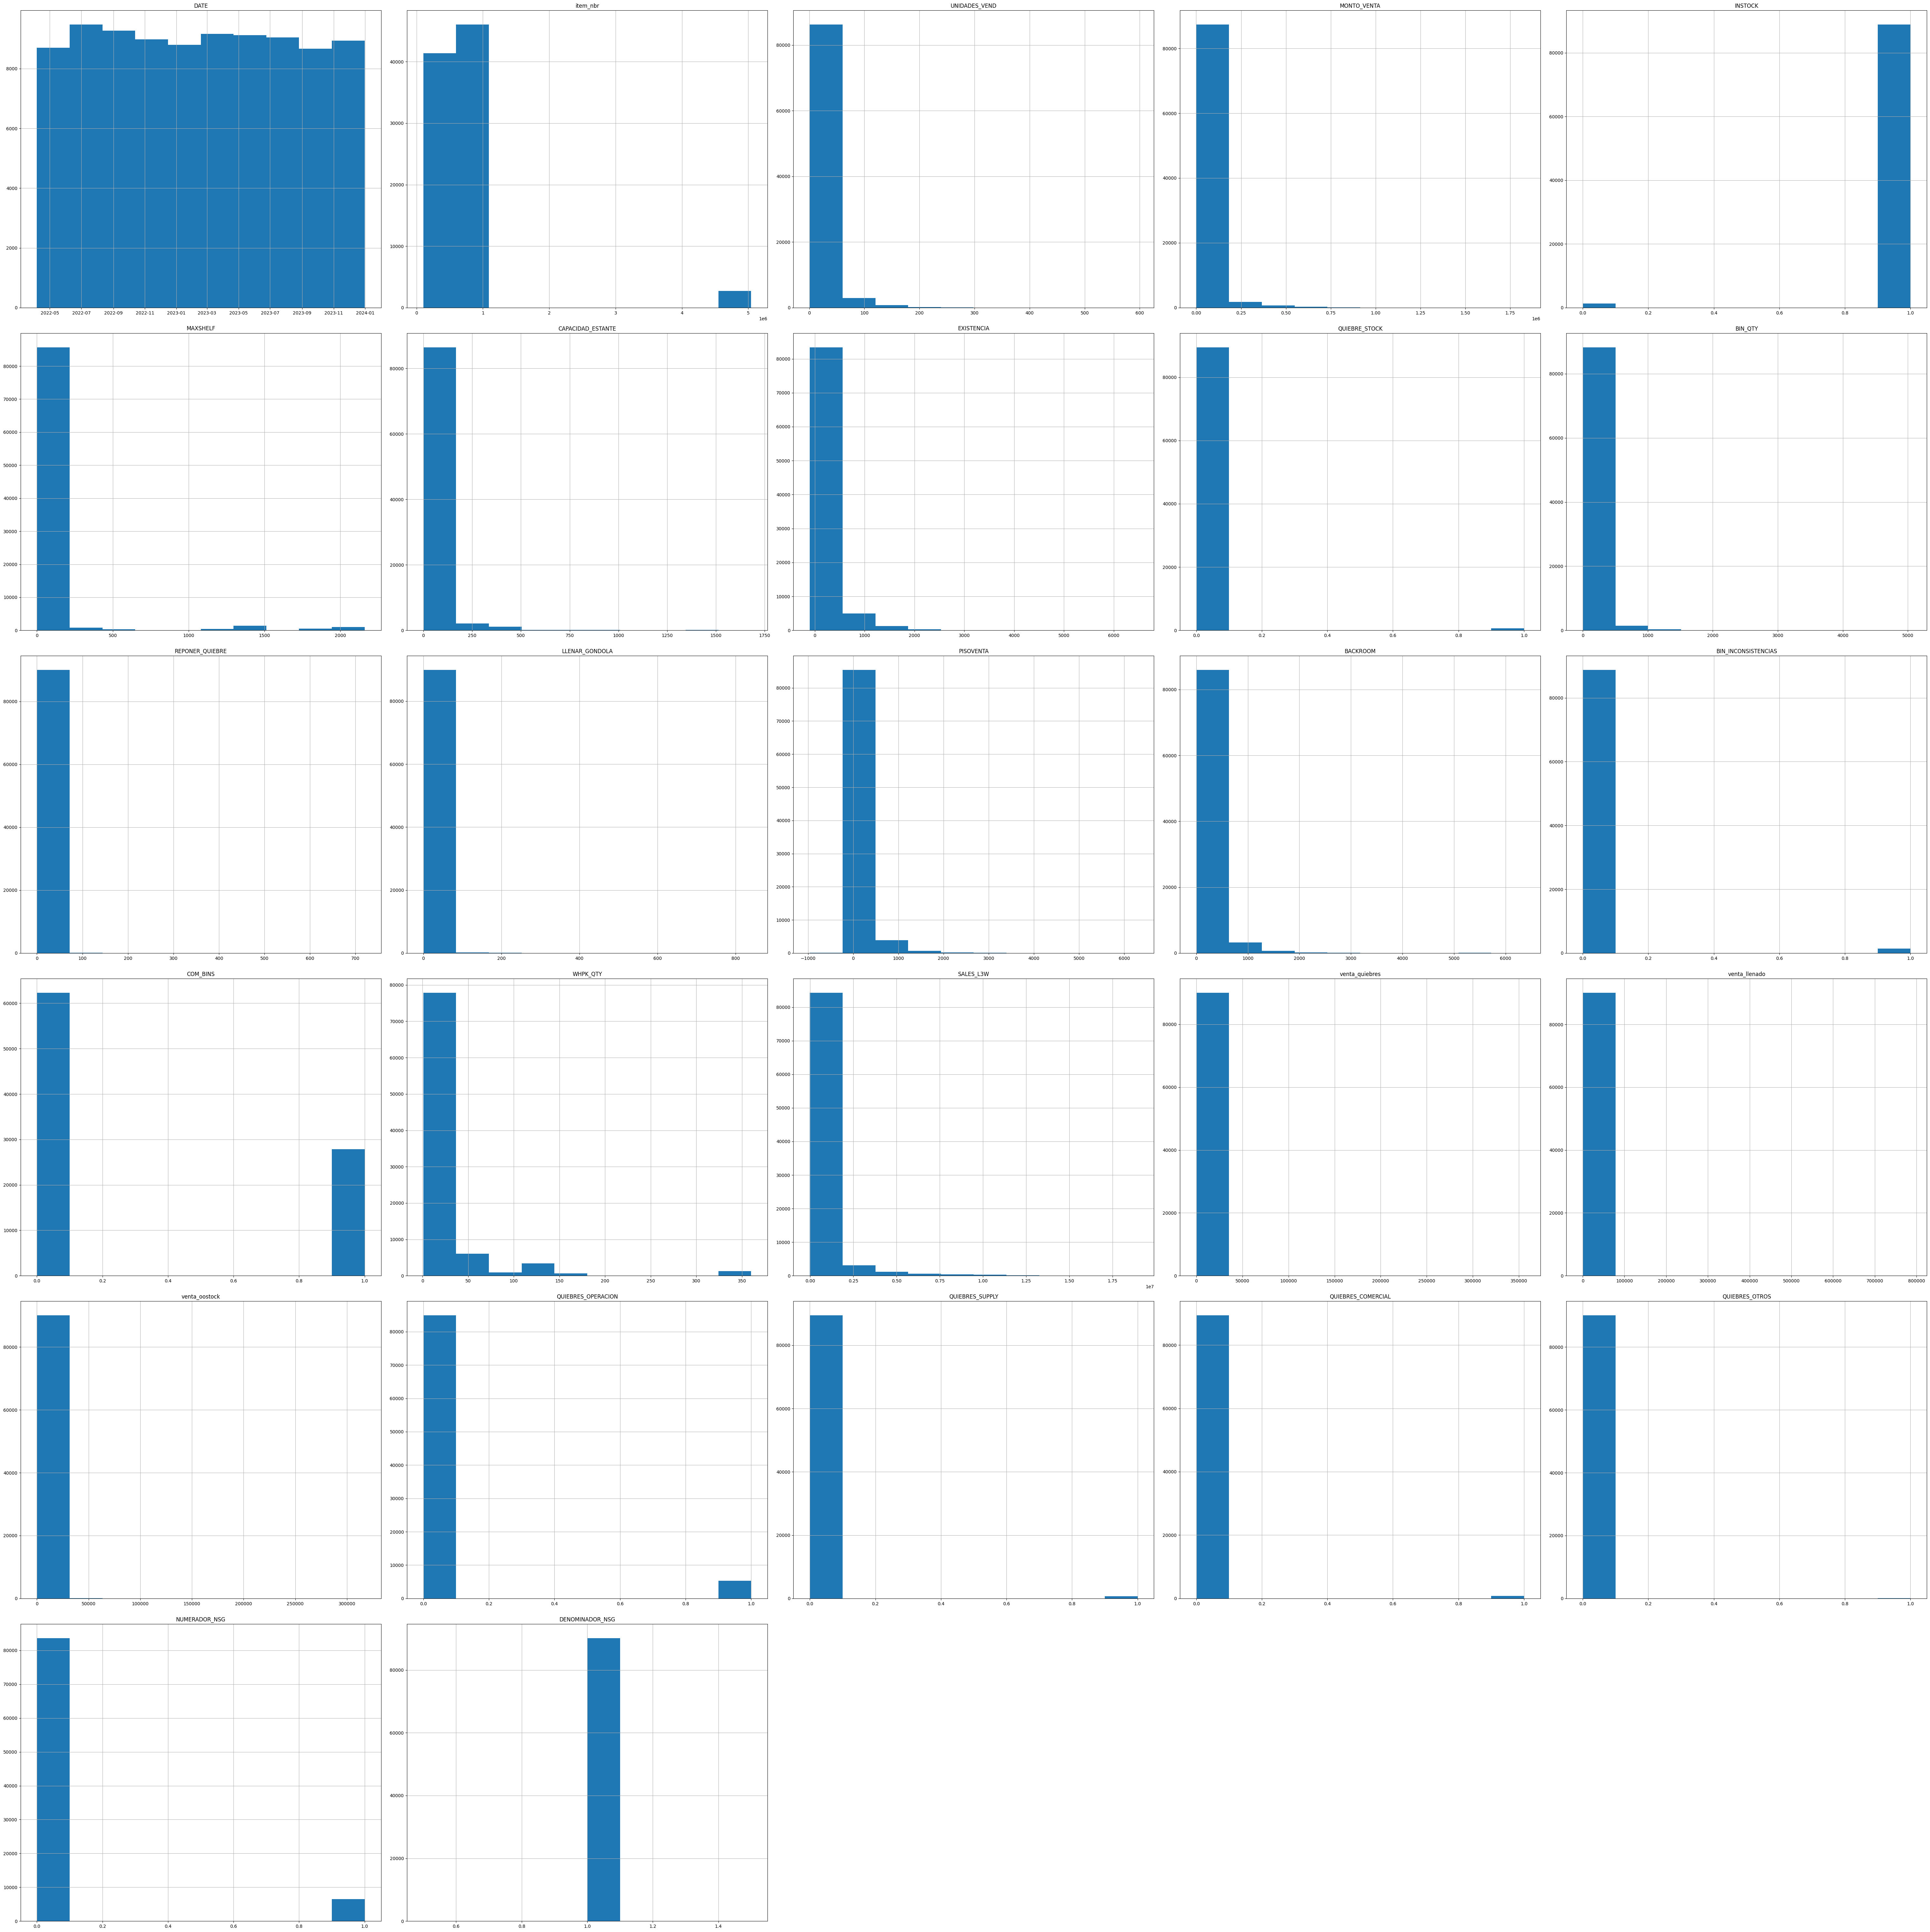

In [31]:
df_heat.hist(figsize=(60,60)) 
plt.tight_layout()
plt.show()

<Axes: xlabel='UNIDADES_VEND', ylabel='Density'>

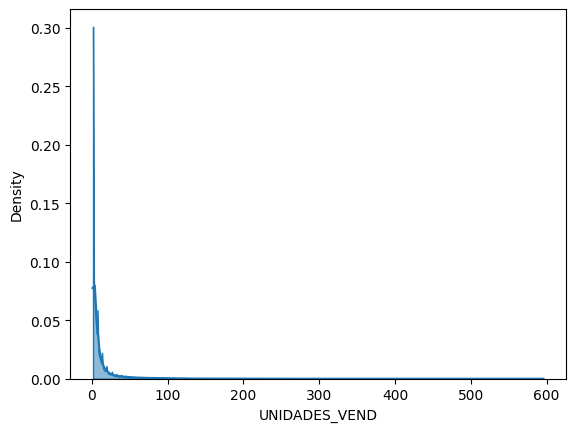

In [32]:
x = df_heat['UNIDADES_VEND']
sns.histplot(x = x,  kde=True, stat="density", bins=500, element = "poly" )

/var/folders/l_/_pmt0znn2bsg_f3mnw2xb1xh0000gn/T/ipykernel_71246/3384153857.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()])


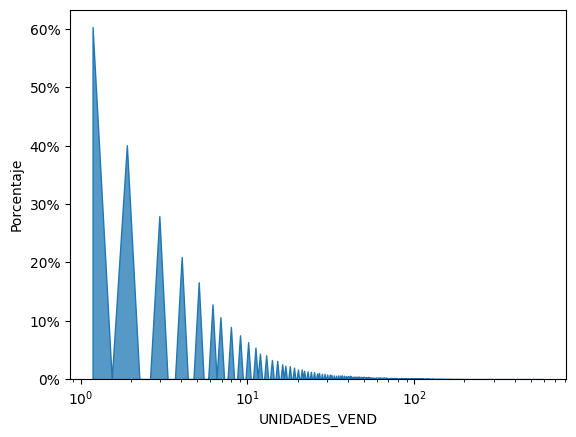

In [33]:
x = df_heat['UNIDADES_VEND']

# Crear el gráfico de distribución con seaborn
sns.histplot(x=x, stat="density", element="poly")

# Configurar el eje x en escala logarítmica
plt.xscale('log')

# Cambiar el eje y a porcentaje
plt.ylabel('Porcentaje')
plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()])

# Mostrar el gráfico
plt.show()

In [34]:
df['UNIDADES_VEND'].describe()

count    90166.000000
mean        11.925759
std         24.104604
min          1.000000
25%          2.000000
50%          4.000000
75%         10.000000
max        596.000000
Name: UNIDADES_VEND, dtype: float64

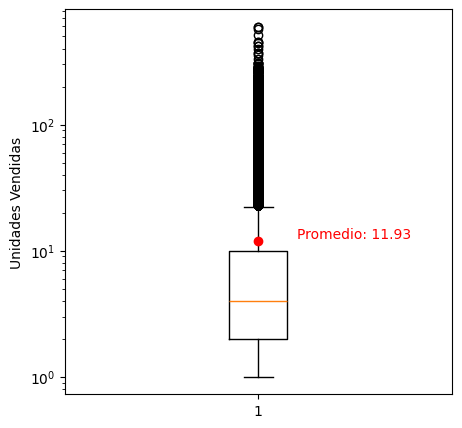

In [35]:
import numpy as np
import matplotlib.pyplot as plt


# Crear el boxplot
plt.figure(figsize=(5,5))
plt.boxplot(df['UNIDADES_VEND'])

# Configurar la escala del eje y en logarítmica
plt.yscale('log')

# Etiquetar el eje y como "Unidades Vendidas"
plt.ylabel('Unidades Vendidas')

# Calcular el promedio y agregar su valor numérico y marcador en el boxplot
promedio = df['UNIDADES_VEND'].mean()
plt.text(1.1, promedio, f'Promedio: {promedio:.2f}', color='red', fontsize=10, verticalalignment='bottom')
plt.plot(1, promedio, 'ro')  # Añadir marcador en el boxplot

# Mostrar el boxplot
plt.show()

In [36]:
df = df_bkp

In [37]:
agg_item_i_df = df.groupby(['DATE', 'item_nbr', 'item_desc_1']).agg({'PISOVENTA':'sum', 'BIN_QTY':'sum', 'EXISTENCIA':'sum', 'INSTOCK':'sum', 'UNIDADES_VEND':'sum'}).reset_index()

In [38]:
agg_item_i_df = agg_item_i_df[agg_item_i_df.item_nbr.isin([657947])]

In [39]:
agg_item_i_df = agg_item_i_df.sort_values(['DATE']).reset_index(drop=True)

In [40]:
agg_item_i_df['PISOVENTA'].describe()

count     618.000000
mean      572.147249
std       398.588802
min      -519.000000
25%       281.250000
50%       509.000000
75%       806.750000
max      2034.000000
Name: PISOVENTA, dtype: float64

In [41]:
agg_item_i_df['INSTOCK'].describe()

count    618.000000
mean       0.995146
std        0.069560
min        0.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: INSTOCK, dtype: float64

In [42]:
agg_item_i_df[agg_item_i_df['INSTOCK'] == 0]

DATE  item_nbr          item_desc_1  PISOVENTA  BIN_QTY  EXISTENCIA  \
268 2023-01-07    657947  QUILQUE LAM 500 GRS      109.0        0       109.0   
363 2023-04-15    657947  QUILQUE LAM 500 GRS        0.0        0         0.0   
393 2023-05-16    657947  QUILQUE LAM 500 GRS       -9.0       72        63.0   

     INSTOCK  UNIDADES_VEND  
268      0.0             80  
363      0.0             63  
393      0.0             61

In [43]:
agg_item_i_df.shape

(618, 8)

In [44]:
agg_item_i_df[agg_item_i_df['EXISTENCIA']< agg_item_i_df['UNIDADES_VEND']]

DATE  item_nbr          item_desc_1  PISOVENTA  BIN_QTY  EXISTENCIA  \
158 2022-09-15    657947  QUILQUE LAM 500 GRS      -79.0        0       -79.0   
159 2022-09-16    657947  QUILQUE LAM 500 GRS        0.0        0         0.0   
160 2022-09-17    657947  QUILQUE LAM 500 GRS      -30.0        0       -30.0   
161 2022-09-20    657947  QUILQUE LAM 500 GRS      -50.0        0       -50.0   
162 2022-09-21    657947  QUILQUE LAM 500 GRS      -99.0        0       -99.0   
163 2022-09-22    657947  QUILQUE LAM 500 GRS        0.0        0         0.0   
164 2022-09-23    657947  QUILQUE LAM 500 GRS        0.0        0         0.0   
165 2022-09-24    657947  QUILQUE LAM 500 GRS        0.0        0         0.0   
166 2022-09-25    657947  QUILQUE LAM 500 GRS        0.0        0         0.0   
167 2022-09-26    657947  QUILQUE LAM 500 GRS        0.0        0         0.0   
168 2022-09-27    657947  QUILQUE LAM 500 GRS        0.0        0         0.0   
175 2022-10-04    657947  QUILQUE LAM 500 GRS      215.0        0       215.0   
177 2022-10-06    657947  QUILQUE LAM 500 GRS       83.0        0        83.0   
178 2022-10-07    657947  QUILQUE LAM 500 GRS       23.0        0        23.0   
179 2022-10-08    657947  QUILQUE LAM 500 GRS        0.0        0         0.0   
363 2023-04-15    657947  QUILQUE LAM 500 GRS        0.0        0         0.0   

     INSTOCK  UNIDADES_VEND  
158      1.0             73  
159      1.0             30  
160      1.0             20  
161      1.0             49  
162      1.0             44  
163      1.0             34  
164      1.0             22  
165      1.0             18  
166      1.0             21  
167      1.0              1  
168      1.0             25  
175      1.0            219  
177      1.0            114  
178      1.0             71  
179      1.0             31  
363      0.0             63

In [45]:
agg_item_df = df.groupby(['DATE', 'item_nbr', 'item_desc_1']).agg({'UNIDADES_VEND':'sum'}).reset_index().sort_values(['UNIDADES_VEND'], ascending = False)

In [46]:
agg_item_df.head()

DATE  item_nbr           item_desc_1  UNIDADES_VEND
56670 2023-05-08    276563  QUESO PARMESANO RALL            596
31920 2022-11-14    581716  Q. MANT R BUENO L500            591
74496 2023-09-09    276563  QUESO PARMESANO RALL            577
31477 2022-11-11    581716  Q. MANT R BUENO L500            509
74654 2023-09-10    276563  QUESO PARMESANO RALL            451

In [47]:
agg_item_df_657947 =  agg_item_df[agg_item_df.item_nbr.isin([657947])]
agg_item_df_657947.head(10)

DATE  item_nbr          item_desc_1  UNIDADES_VEND
40812 2023-01-16    657947  QUILQUE LAM 500 GRS            279
34916 2022-12-05    657947  QUILQUE LAM 500 GRS            278
54759 2023-04-24    657947  QUILQUE LAM 500 GRS            276
33911 2022-11-28    657947  QUILQUE LAM 500 GRS            267
35925 2022-12-12    657947  QUILQUE LAM 500 GRS            260
39835 2023-01-09    657947  QUILQUE LAM 500 GRS            252
41950 2023-01-24    657947  QUILQUE LAM 500 GRS            243
41807 2023-01-23    657947  QUILQUE LAM 500 GRS            239
55964 2023-05-03    657947  QUILQUE LAM 500 GRS            235
35064 2022-12-06    657947  QUILQUE LAM 500 GRS            221

In [48]:
agg_item_df_657947 = agg_item_df_657947.sort_values(['DATE']).reset_index(drop=True)


In [49]:
df_media = agg_item_df_657947

In [50]:

# Extraer el mes y el año de la columna de fecha
df_media['MES'] = df_media['DATE'].dt.month
df_media['AÑO'] = df_media['DATE'].dt.year

# Agrupar por producto, año y mes, y calcular la suma de la cantidad vendida
ventas_por_mes = df_media.groupby(['AÑO'])['UNIDADES_VEND'].mean().reset_index()
ventas_por_mes['UNIDADES_VEND'] = ventas_por_mes['UNIDADES_VEND'].round(1)


ventas_por_mes

AÑO  UNIDADES_VEND
0  2022           93.4
1  2023           97.3

In [51]:
agg_item_df_657947['UNIDADES_VEND'].describe()

count    618.000000
mean      95.613269
std       50.530164
min        1.000000
25%       58.250000
50%       83.000000
75%      121.750000
max      279.000000
Name: UNIDADES_VEND, dtype: float64

In [52]:
df_657947 = agg_item_df_657947
df_657947.head(10)

DATE  item_nbr          item_desc_1  UNIDADES_VEND  MES   AÑO
0 2022-04-06    657947  QUILQUE LAM 500 GRS             62    4  2022
1 2022-04-07    657947  QUILQUE LAM 500 GRS             56    4  2022
2 2022-04-08    657947  QUILQUE LAM 500 GRS             57    4  2022
3 2022-04-09    657947  QUILQUE LAM 500 GRS             53    4  2022
4 2022-04-10    657947  QUILQUE LAM 500 GRS             59    4  2022
5 2022-04-11    657947  QUILQUE LAM 500 GRS             93    4  2022
6 2022-04-12    657947  QUILQUE LAM 500 GRS             45    4  2022
7 2022-04-13    657947  QUILQUE LAM 500 GRS             73    4  2022
8 2022-04-14    657947  QUILQUE LAM 500 GRS             56    4  2022
9 2022-04-15    657947  QUILQUE LAM 500 GRS             27    4  2022

In [53]:
df_657947.UNIDADES_VEND.describe()

count    618.000000
mean      95.613269
std       50.530164
min        1.000000
25%       58.250000
50%       83.000000
75%      121.750000
max      279.000000
Name: UNIDADES_VEND, dtype: float64

In [54]:
df_657947.dtypes

DATE             datetime64[ns]
item_nbr                  int64
item_desc_1              object
UNIDADES_VEND             int64
MES                       int64
AÑO                       int64
dtype: object

In [55]:
#adding holiday data

holiday = pd.DataFrame([])


for date_, name in sorted(holidays.CL(years=[2021, 2022, 2023, 2024]).items()):
    holiday = pd.concat([holiday, pd.DataFrame({'ds': date_, 'holiday': "CL-Holidays", 'lower_window': -2, 'upper_window':0}, index=[0])], ignore_index=True) 

holiday['ds'] = pd.to_datetime(holiday['ds'], format='%Y-%m-%d', errors='ignore')
holiday

ds      holiday  lower_window  upper_window
0  2021-01-01  CL-Holidays            -2             0
1  2021-04-02  CL-Holidays            -2             0
2  2021-04-03  CL-Holidays            -2             0
3  2021-05-01  CL-Holidays            -2             0
4  2021-05-21  CL-Holidays            -2             0
..        ...          ...           ...           ...
63 2024-10-12  CL-Holidays            -2             0
64 2024-10-31  CL-Holidays            -2             0
65 2024-11-01  CL-Holidays            -2             0
66 2024-12-08  CL-Holidays            -2             0
67 2024-12-25  CL-Holidays            -2             0

[68 rows x 4 columns]

In [56]:
#setting variables
feature = 'UNIDADES_VEND'
prediction_days = 60

In [57]:
#Variables

forecast_start_dt = date(2023,12,1) #data set ends of (2023,8,31)
forecast_start_date = (forecast_start_dt).strftime("%Y-%m-%d") 
print(forecast_start_date)

2023-12-01


In [58]:
#PROPHET MODEL

df_copy = df_657947.copy()
df_copy = df_copy.rename(columns={'DATE': 'ds', feature: 'y'})
df_copy = df_copy.drop(['item_nbr', 'item_desc_1'], axis=1)
df_copy[['y']] = df_copy[['y']].apply(pd.to_numeric)

df_copy['ds'] = pd.to_datetime(df_copy['ds'])

train_set = df_copy[(df_copy['ds'] < forecast_start_date) ]

m = Prophet(holidays=holiday, changepoint_prior_scale = 0.1, seasonality_prior_scale= 0.1, weekly_seasonality= True).fit(train_set)

future = m.make_future_dataframe(periods=31)
fcst_prophet_train = m.predict(future)

#adding filter to only add the forecasted data into predicted_df
filter = fcst_prophet_train['ds']>=forecast_start_date 
predicted_df = fcst_prophet_train[filter][['ds','yhat']]

16:54:10 - cmdstanpy - INFO - Chain [1] start processing
16:54:10 - cmdstanpy - INFO - Chain [1] done processing


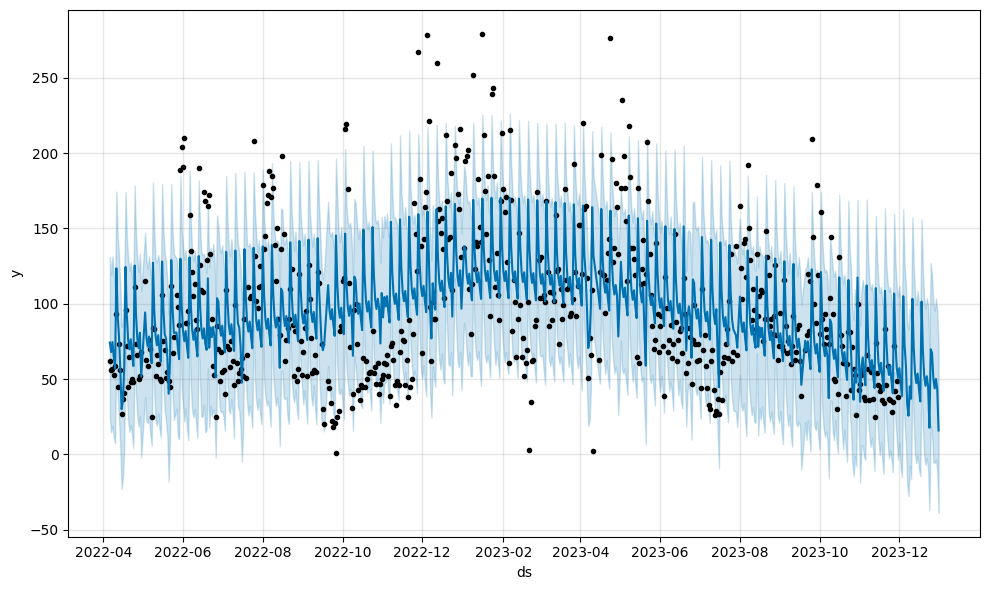

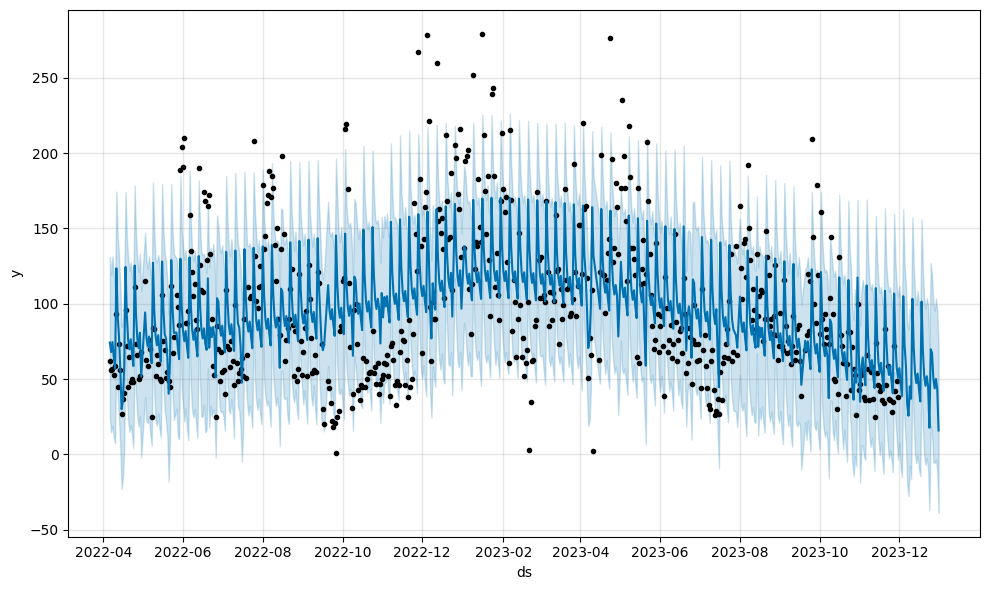

In [59]:
m.plot(fcst_prophet_train)

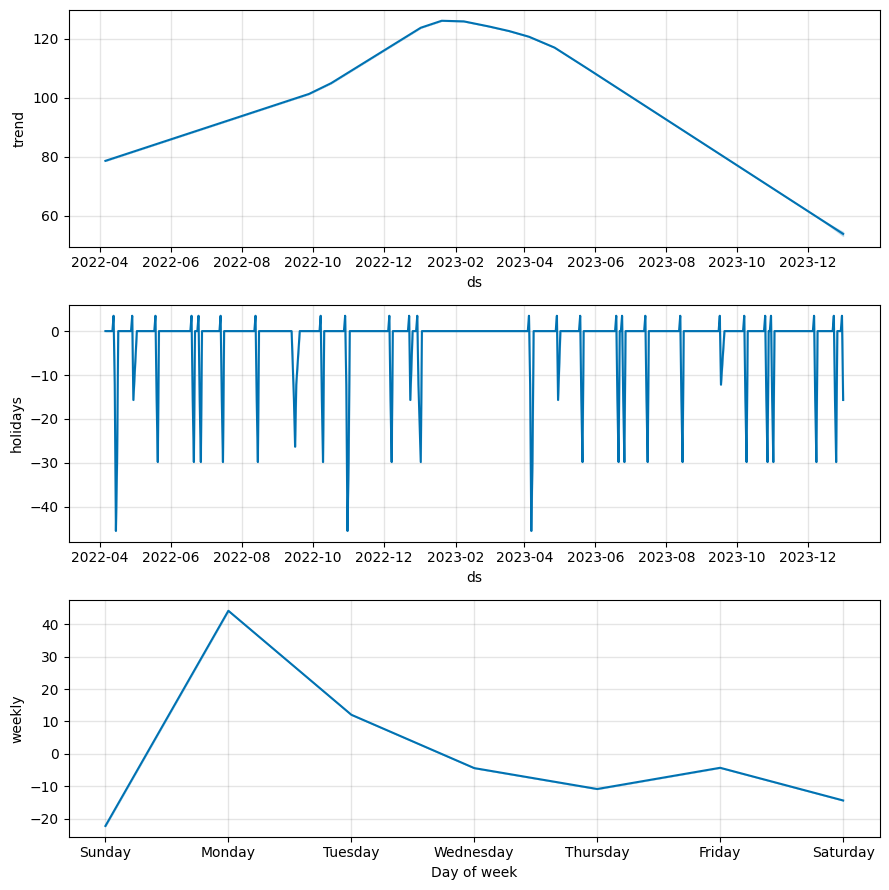

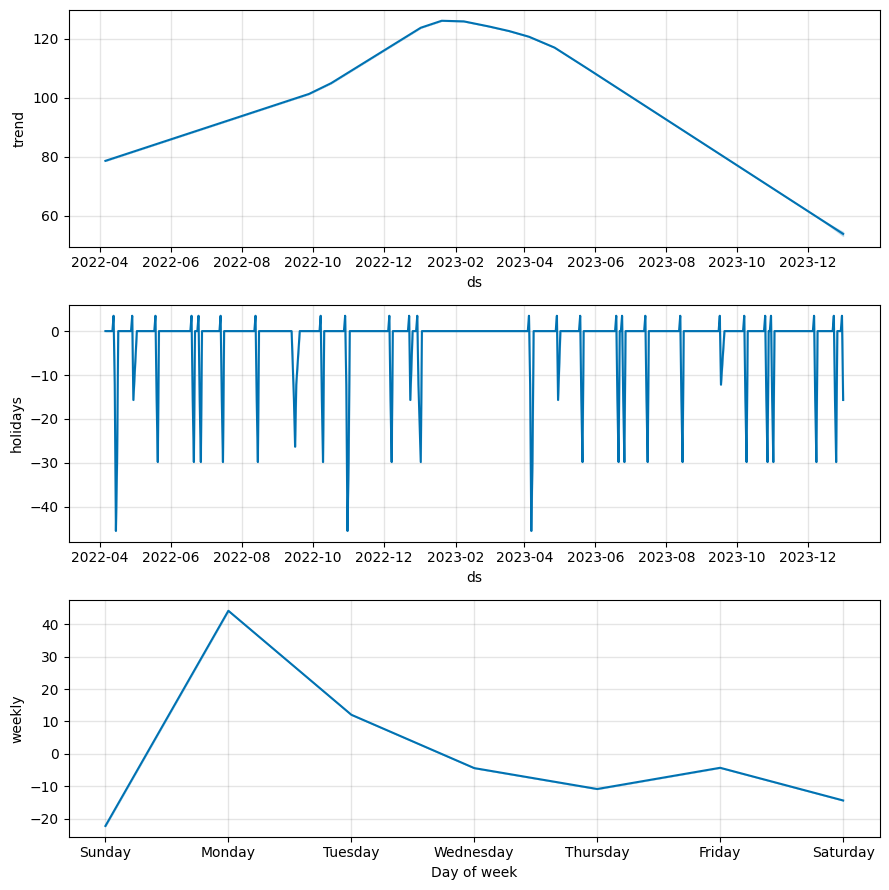

In [60]:
m.plot_components(fcst_prophet_train)



In [61]:
fcst_prophet_train.head()

ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0 2022-04-06  78.658470   24.013376  131.033330    78.658470    78.658470   
1 2022-04-07  78.788013   14.799323  119.442142    78.788013    78.788013   
2 2022-04-08  78.917556   18.940224  131.470996    78.917556    78.917556   
3 2022-04-09  79.047099   11.325476  119.808011    79.047099    79.047099   
4 2022-04-10  79.176642    7.343572  110.138086    79.176642    79.176642   

   CL-Holidays  CL-Holidays_lower  CL-Holidays_upper  additive_terms  ...  \
0          0.0                0.0                0.0       -4.411188  ...   
1          0.0                0.0                0.0      -10.871045  ...   
2          0.0                0.0                0.0       -4.313977  ...   
3          0.0                0.0                0.0      -14.410574  ...   
4          0.0                0.0                0.0      -22.292331  ...   

   holidays  holidays_lower  holidays_upper     weekly  weekly_lower  \
0       0.0             0.0             0.0  -4.411188     -4.411188   
1       0.0             0.0             0.0 -10.871045    -10.871045   
2       0.0             0.0             0.0  -4.313977     -4.313977   
3       0.0             0.0             0.0 -14.410574    -14.410574   
4       0.0             0.0             0.0 -22.292331    -22.292331   

   weekly_upper  multiplicative_terms  multiplicative_terms_lower  \
0     -4.411188                   0.0                         0.0   
1    -10.871045                   0.0                         0.0   
2     -4.313977                   0.0                         0.0   
3    -14.410574                   0.0                         0.0   
4    -22.292331                   0.0                         0.0   

   multiplicative_terms_upper       yhat  
0                         0.0  74.247282  
1                         0.0  67.916968  
2                         0.0  74.603579  
3                         0.0  64.636525  
4                         0.0  56.884311  

[5 rows x 22 columns]

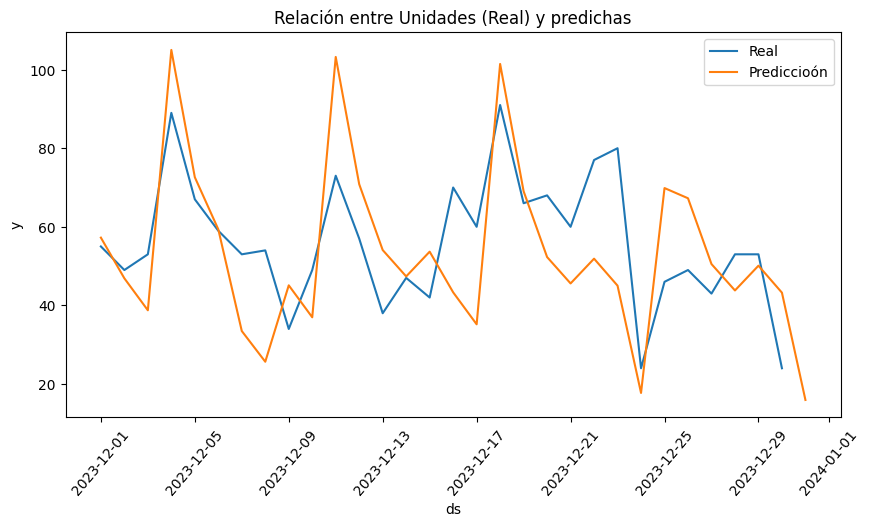

In [62]:
x = predicted_df.ds
y1 = df_copy['y']
fig, ax = plt.subplots(figsize=(10, 5))
y2 = predicted_df['yhat']
sns.lineplot(x = x, y = y1, data = predicted_df , label='Real')
sns.lineplot(x = x, y = y2, data = predicted_df, label='Prediccioón')
plt.xticks(rotation=50)


# Añadir título
plt.title('Relación entre Unidades (Real) y predichas')

# Rotar las etiquetas del eje x para mejor legibilidad
plt.xticks(rotation=50)

# Mostrar la leyenda
plt.legend()

# Mostrar el gráfico
plt.show()

In [63]:
predicted_df = predicted_df.merge(df_copy)

In [64]:
predicted_df.dtypes

ds      datetime64[ns]
yhat           float64
y                int64
MES              int64
AÑO              int64
dtype: object

In [65]:
df_copy.dtypes

ds     datetime64[ns]
y               int64
MES             int64
AÑO             int64
dtype: object

In [66]:
predicted_df

ds        yhat   y  MES   AÑO
0  2023-12-01   57.242841  55   12  2023
1  2023-12-02   46.891340  49   12  2023
2  2023-12-03   38.754679  53   12  2023
3  2023-12-04  105.011619  89   12  2023
4  2023-12-05   72.616805  67   12  2023
5  2023-12-06   59.354620  59   12  2023
6  2023-12-07   33.477497  53   12  2023
7  2023-12-08   25.661033  54   12  2023
8  2023-12-09   45.107011  34   12  2023
9  2023-12-10   36.970350  49   12  2023
10 2023-12-11  103.227290  73   12  2023
11 2023-12-12   70.832476  57   12  2023
12 2023-12-13   54.086780  38   12  2023
13 2023-12-14   47.372019  47   12  2023
14 2023-12-15   53.674183  42   12  2023
15 2023-12-16   43.322681  70   12  2023
16 2023-12-17   35.186020  60   12  2023
17 2023-12-18  101.442961  91   12  2023
18 2023-12-19   69.048146  66   12  2023
19 2023-12-20   52.302451  68   12  2023
20 2023-12-21   45.587689  60   12  2023
21 2023-12-22   51.889853  77   12  2023
22 2023-12-23   45.021862  80   12  2023
23 2023-12-24   17.722839  24   12  2023
24 2023-12-26   67.263817  46   12  2023
25 2023-12-27   50.518121  49   12  2023
26 2023-12-28   43.803360  43   12  2023
27 2023-12-29   50.105524  53   12  2023
28 2023-12-30   43.237533  53   12  2023
29 2023-12-31   15.938510  24   12  2023

In [67]:
df_last = pd.merge(fcst_prophet_train[['yhat','ds']], agg_item_i_df, left_on='ds', right_on='DATE', how='inner')
df_last['INSTOCK%']= df_last['EXISTENCIA']*100/ df_last['yhat']
df_last = df_last.rename(columns={'yhat': 'UNID_VEND_PRED'})

In [68]:
df_last['INSTOCK%'] = np.where(df_last['INSTOCK%'] < 0, 0, df_last['INSTOCK%'])

In [69]:
df_last['INSTOCK%'].describe()

count     618.000000
mean      948.194803
std       514.258504
min         0.000000
25%       618.443971
50%       887.557237
75%      1225.911840
max      5213.787225
Name: INSTOCK%, dtype: float64

In [70]:
columnas_a_eliminar = ['ds', 'UNIDADES_VEND']
df_last = df_last.drop(columns = columnas_a_eliminar, axis=1)

In [71]:
nuevo_orden = ['DATE', 'item_nbr', 'PISOVENTA', 'BIN_QTY', 'EXISTENCIA', 'UNID_VEND_PRED', 'INSTOCK','INSTOCK%']

# Reordenar las columnas
df_last = df_last.reindex(columns=nuevo_orden)

In [72]:
df_last[df_last['INSTOCK%'] <= 100].reset_index(drop=True).round(1)

DATE  item_nbr  PISOVENTA  BIN_QTY  EXISTENCIA  UNID_VEND_PRED  \
0  2022-09-15    657947      -79.0        0       -79.0            73.1   
1  2022-09-16    657947        0.0        0         0.0            69.1   
2  2022-09-17    657947      -30.0        0       -30.0            73.3   
3  2022-09-20    657947      -50.0        0       -50.0           112.4   
4  2022-09-21    657947      -99.0        0       -99.0            96.0   
5  2022-09-22    657947        0.0        0         0.0            89.7   
6  2022-09-23    657947        0.0        0         0.0            96.4   
7  2022-09-24    657947        0.0        0         0.0            86.4   
8  2022-09-25    657947        0.0        0         0.0            78.7   
9  2022-09-26    657947        0.0        0         0.0           145.3   
10 2022-09-27    657947        0.0        0         0.0           113.3   
11 2022-10-06    657947       83.0        0        83.0            92.0   
12 2022-10-07    657947       23.0        0        23.0            98.7   
13 2022-10-08    657947        0.0        0         0.0            92.3   
14 2023-01-07    657947      109.0        0       109.0           110.0   
15 2023-04-15    657947        0.0        0         0.0           104.6   
16 2023-05-16    657947       -9.0       72        63.0           124.4   

    INSTOCK  INSTOCK%  
0       1.0       0.0  
1       1.0       0.0  
2       1.0       0.0  
3       1.0       0.0  
4       1.0       0.0  
5       1.0       0.0  
6       1.0       0.0  
7       1.0       0.0  
8       1.0       0.0  
9       1.0       0.0  
10      1.0       0.0  
11      1.0      90.2  
12      1.0      23.3  
13      1.0       0.0  
14      0.0      99.1  
15      0.0       0.0  
16      0.0      50.7

In [73]:
mape(predicted_df['y'], predicted_df['yhat'])


23.305982305638075

In [74]:
RMSE(predicted_df['y'], predicted_df['yhat'])

16.196751119439178

In [75]:
from sklearn.metrics import r2_score
r2_score(predicted_df['y'], predicted_df['yhat'])

-0.007339639913426899

In [76]:
m = Prophet()
m.fit(train_set)
df_cv = cross_validation(m, initial='500 days', period='30 days', horizon = '30 days')

16:54:13 - cmdstanpy - INFO - Chain [1] start processing
16:54:13 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/3 [00:00<?, ?it/s]

16:54:13 - cmdstanpy - INFO - Chain [1] start processing
16:54:13 - cmdstanpy - INFO - Chain [1] done processing
16:54:13 - cmdstanpy - INFO - Chain [1] start processing
16:54:13 - cmdstanpy - INFO - Chain [1] done processing
16:54:13 - cmdstanpy - INFO - Chain [1] start processing
16:54:13 - cmdstanpy - INFO - Chain [1] done processing


In [77]:
df_p = performance_metrics(df_cv)
df_p[['horizon','rmse']]

horizon       rmse
0   3 days  18.303076
1   4 days  18.882821
2   5 days  19.807433
3   6 days  25.814434
4   7 days  26.807606
5   8 days  29.432266
6   9 days  26.986109
7  10 days  27.564395
8  11 days  29.713196
9  12 days  31.566668
10 13 days  34.924766
11 14 days  32.781845
12 15 days  28.017529
13 16 days  24.183822
14 17 days  23.070053
15 18 days  23.967249
16 19 days  23.018819
17 20 days  25.856133
18 21 days  29.506176
19 22 days  32.004152
20 23 days  33.264051
21 24 days  42.205614
22 25 days  41.375604
23 26 days  34.816863
24 27 days  27.266922
25 28 days  45.243793
26 29 days  47.616684
27 30 days  45.350596

In [78]:
df_cv['mape'] = (df_cv['y']-df_cv['yhat'])/(df_cv['y'])*100
df_cv['overestimate'] = df_cv['yhat'] > df_cv['y'] 

df_cv.sort_values('mape',ascending=False).head(10)

ds        yhat  yhat_lower  yhat_upper    y     cutoff       mape  \
25 2023-09-29   84.835497   30.949707  143.523957  179 2023-09-01  52.605868   
20 2023-09-24   67.536009    7.807180  125.035415  115 2023-09-01  41.273035   
26 2023-09-30   75.929382   18.288013  134.799948  119 2023-09-01  36.193797   
21 2023-09-25  135.655263   81.492850  193.476444  209 2023-09-01  35.093175   
18 2023-09-22   85.797638   26.757606  141.903464  120 2023-09-01  28.501969   
22 2023-09-26  104.577251   46.754554  163.003058  144 2023-09-01  27.376909   
36 2023-10-10  104.912865   49.650610  164.298528  144 2023-10-01  27.143844   
27 2023-10-01   66.573868    7.585877  121.328566   80 2023-09-01  16.782665   
28 2023-10-02  137.345168   82.467775  194.021210  161 2023-10-01  14.692442   
31 2023-10-05   81.567688   23.964726  135.760559   93 2023-10-01  12.292809   

    overestimate  
25         False  
20         False  
26         False  
21         False  
18         False  
22         False  
36         False  
27         False  
28         False  
31         False

In [79]:
param_grid = {  
    'changepoint_prior_scale': [0.001, 0.01, 0.1, 0.5],
    'seasonality_prior_scale': [0.01, 0.1, 1.0, 10.0],
    'weekly_seasonality':[10],
    'yearly_seasonality':[5]
}

# Generate all combinations of parameters
all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
rmses = [] 

# Use cross validation to evaluate all parameters
for params in all_params:
    m = Prophet(**params).fit(train_set)  # Fit model with given params
    df_cv = cross_validation(m, initial='570 days', period='30 days', horizon = '30 days', parallel='processes')
    df_p = performance_metrics(df_cv, rolling_window=1)
    rmses.append(df_p['rmse'].values[0])

# Find the best parameters
tuning_results = pd.DataFrame(all_params)
tuning_results['rmse'] = rmses

16:54:14 - cmdstanpy - INFO - Chain [1] start processing
16:54:14 - cmdstanpy - INFO - Chain [1] done processing
16:54:14 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
16:54:14 - cmdstanpy - INFO - Chain [1] start processing
16:54:15 - cmdstanpy - INFO - Chain [1] done processing
16:54:17 - cmdstanpy - INFO - Chain [1] start processing
16:54:17 - cmdstanpy - INFO - Chain [1] done processing
16:54:17 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
16:54:17 - cmdstanpy - INFO - Chain [1] start processing
16:54:18 - cmdstanpy - INFO - Chain [1] done processing
16:54:19 - cmdstanpy - INFO - Chain [1] start processing
16:54:19 - cmdstanpy - INFO - Chain [1] done processing
16:54:19 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abn

In [80]:
tuning_results.sort_values('rmse') 

changepoint_prior_scale  seasonality_prior_scale  weekly_seasonality  \
8                     0.100                     0.01                  10   
12                    0.500                     0.01                  10   
11                    0.100                    10.00                  10   
10                    0.100                     1.00                  10   
9                     0.100                     0.10                  10   
5                     0.010                     0.10                  10   
7                     0.010                    10.00                  10   
2                     0.001                     1.00                  10   
6                     0.010                     1.00                  10   
3                     0.001                    10.00                  10   
1                     0.001                     0.10                  10   
4                     0.010                     0.01                  10   
13                    0.500                     0.10                  10   
0                     0.001                     0.01                  10   
15                    0.500                    10.00                  10   
14                    0.500                     1.00                  10   

    yearly_seasonality       rmse  
8                    5  23.061583  
12                   5  28.581937  
11                   5  35.454510  
10                   5  36.090572  
9                    5  36.426873  
5                    5  41.228326  
7                    5  42.454563  
2                    5  43.697296  
6                    5  43.957569  
3                    5  44.750657  
1                    5  44.839580  
4                    5  48.128017  
13                   5  51.725699  
0                    5  52.349075  
15                   5  54.991983  
14                   5  55.758939

In [81]:
tuning_results.sort_values('rmse').reset_index(drop=True).iloc[0]

changepoint_prior_scale     0.100000
seasonality_prior_scale     0.010000
weekly_seasonality         10.000000
yearly_seasonality          5.000000
rmse                       23.061583
Name: 0, dtype: float64

In [82]:
dict(tuning_results.sort_values('rmse').reset_index(drop=True).iloc[0])


{'changepoint_prior_scale': 0.1,
 'seasonality_prior_scale': 0.01,
 'weekly_seasonality': 10.0,
 'yearly_seasonality': 5.0,
 'rmse': 23.061583357291084}

In [83]:
params_dictionary = dict(tuning_results.sort_values('rmse').reset_index(drop=True).drop('rmse',axis='columns').iloc[0])

m = Prophet(changepoint_prior_scale = 0.1, 
            seasonality_prior_scale = 0.01,
            weekly_seasonality= 10,
            yearly_seasonality= 2.5,
           holidays =holiday)

In [84]:
m.fit(train_set)

future = m.make_future_dataframe(periods=prediction_days)
fcst_prophet_train = m.predict(future)

#adding filter to only add the forecasted data into predicted_df
filter = fcst_prophet_train['ds']>=forecast_start_date 
predicted_df = fcst_prophet_train[filter][['ds','yhat']]



16:55:02 - cmdstanpy - INFO - Chain [1] start processing
16:55:02 - cmdstanpy - INFO - Chain [1] done processing


In [85]:

predicted_df = predicted_df.merge(df_copy)

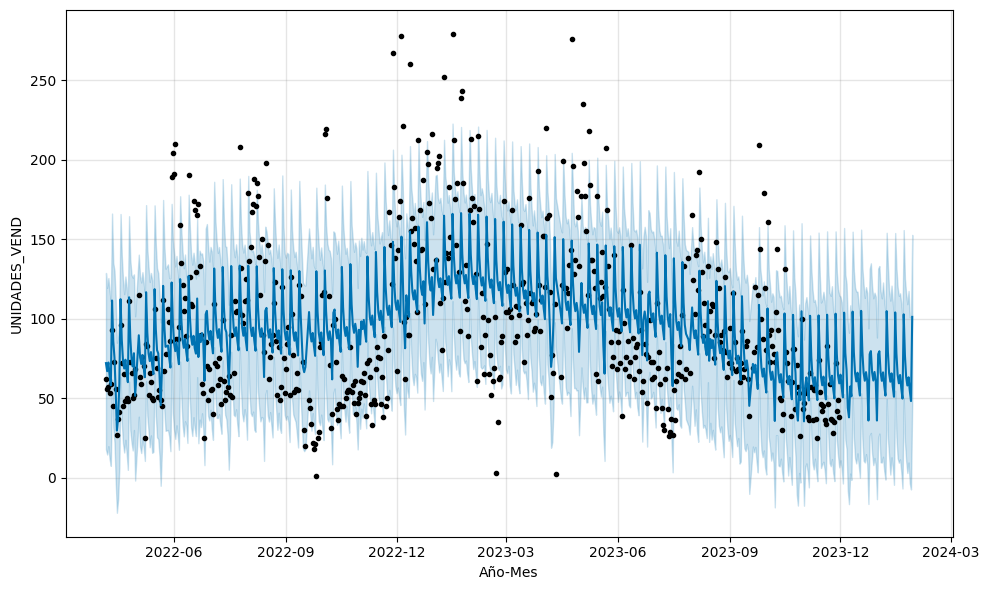

In [86]:
m.plot(fcst_prophet_train)

# Etiquetas personalizadas para los ejes
plt.xlabel('Año-Mes')
plt.ylabel('UNIDADES_VEND')

# Mostrar el gráfico
plt.show()


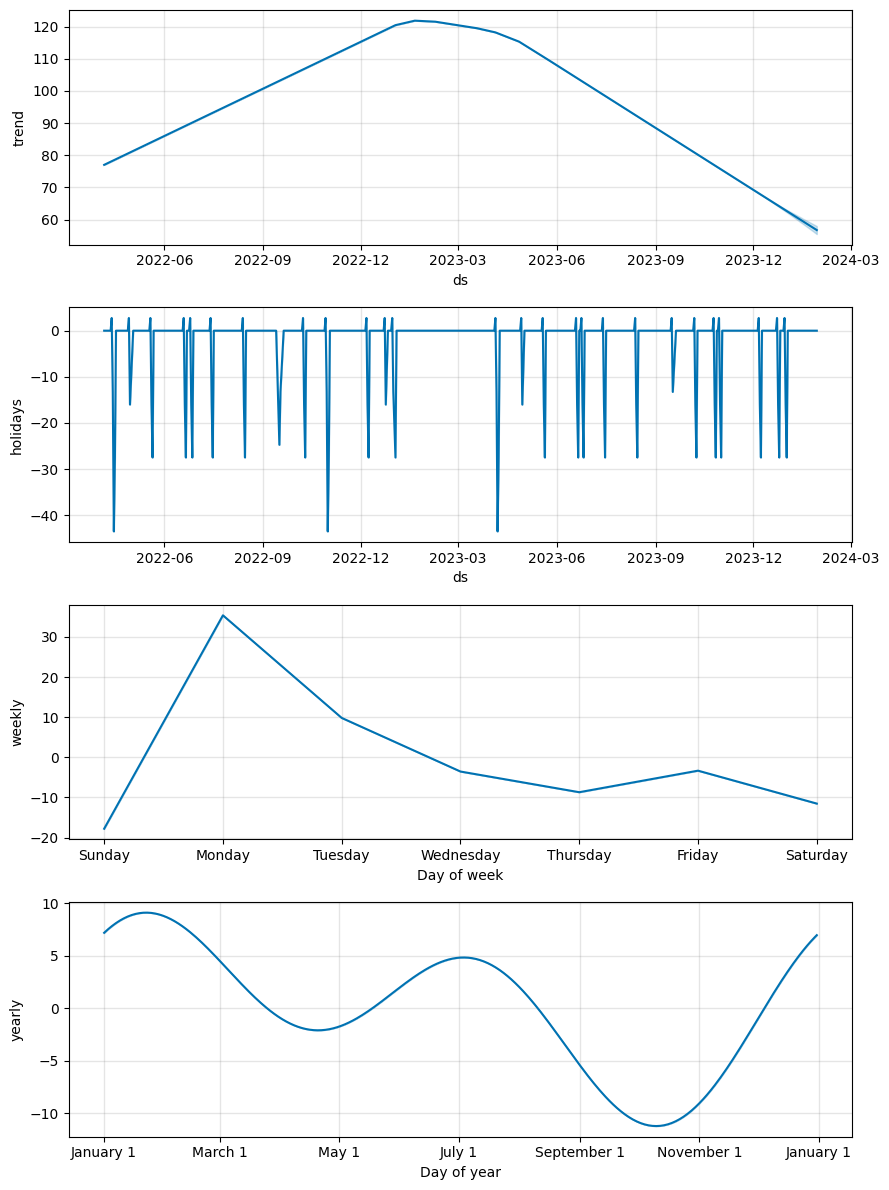

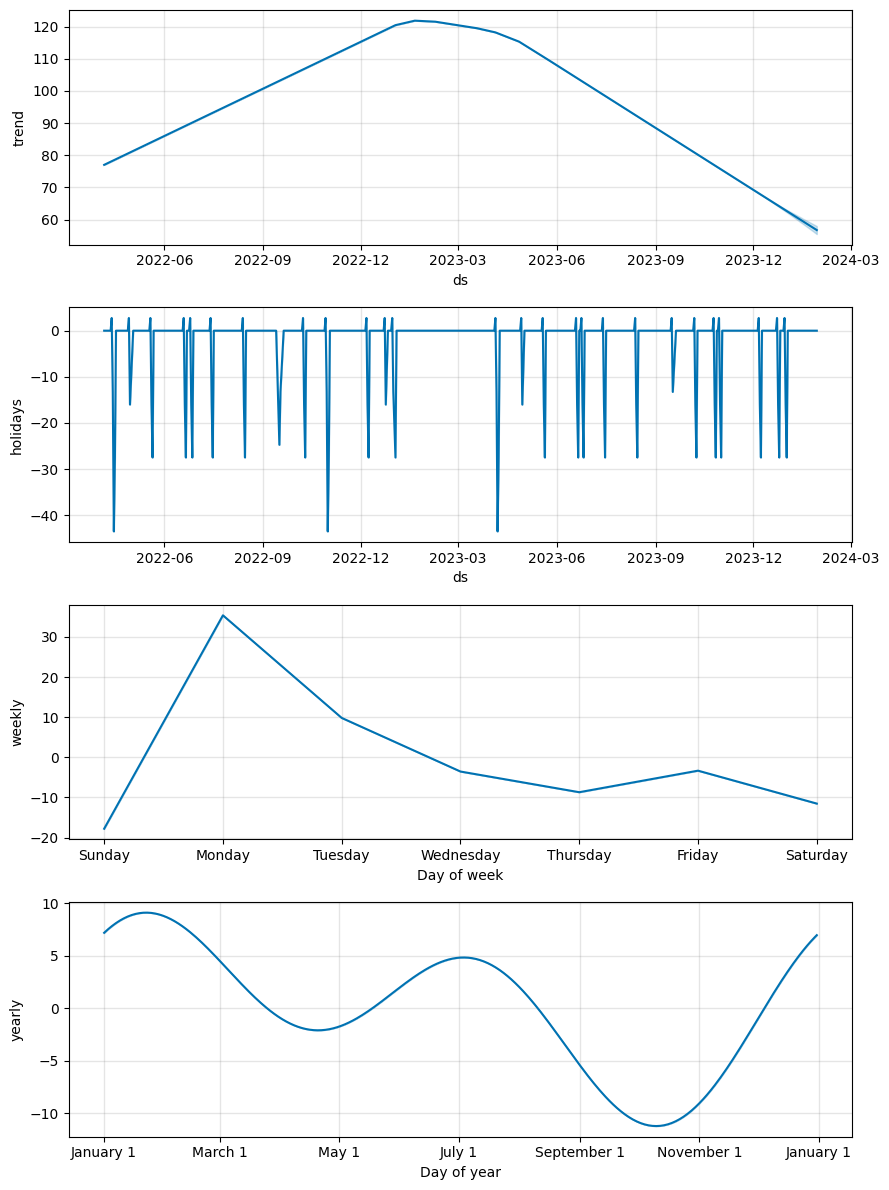

In [87]:
m.plot_components(fcst_prophet_train)


In [88]:
RMSE(predicted_df['y'], predicted_df['yhat'])

16.125742442995342

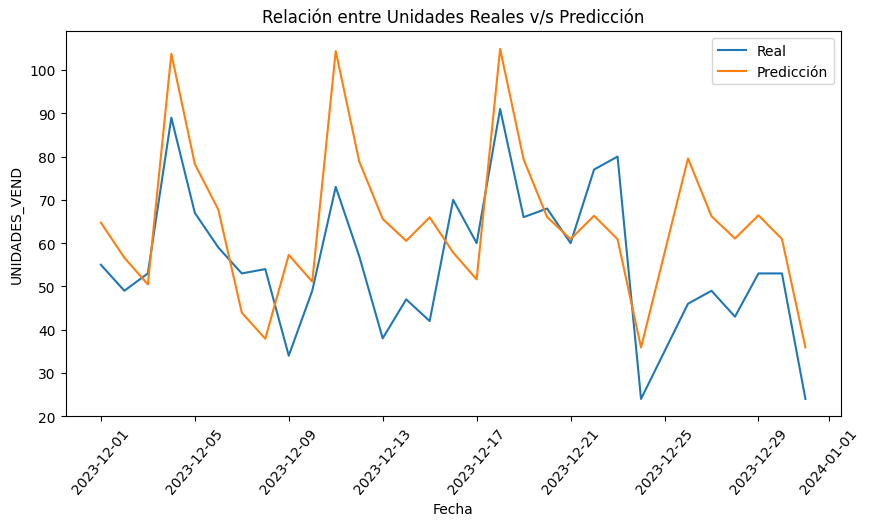

In [89]:
x = predicted_df.ds
y1 = predicted_df['y']
fig, ax = plt.subplots(figsize=(10, 5))
y2 = predicted_df['yhat']
sns.lineplot(x = x, y = y1, data = predicted_df , label='Real')
sns.lineplot(x = x, y = y2, data = predicted_df, label='Predicción')
plt.xticks(rotation=50)


# Añadir título
plt.title('Relación entre Unidades Reales v/s Predicción')

# Rotar las etiquetas del eje x para mejor legibilidad
plt.xticks(rotation=50)
plt.xlabel('Fecha')
plt.ylabel('UNIDADES_VEND')
# Mostrar la leyenda
plt.legend()

# Mostrar el gráfico
plt.show()

In [90]:
df = agg_item_df_657947

In [91]:
df.shape

(618, 6)

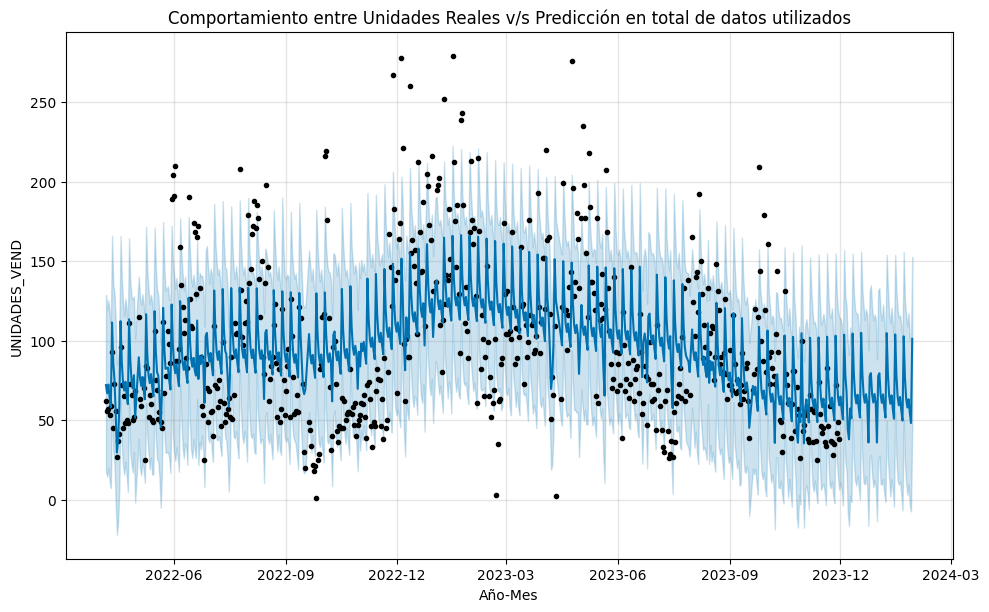

In [92]:
m.plot(fcst_prophet_train)

# Etiquetas personalizadas para los ejes
plt.title('Comportamiento entre Unidades Reales v/s Predicción en total de datos utilizados')
plt.xlabel('Año-Mes')
plt.ylabel('UNIDADES_VEND')

# Mostrar el gráfico
plt.show()

In [93]:
pd.merge(agg_item_i_df, fcst_prophet_train[['ds','yhat']], left_on='DATE', right_on='ds', how='left')

DATE  item_nbr          item_desc_1  PISOVENTA  BIN_QTY  EXISTENCIA  \
0   2022-04-06    657947  QUILQUE LAM 500 GRS        0.0        0       667.0   
1   2022-04-07    657947  QUILQUE LAM 500 GRS        0.0        0       596.0   
2   2022-04-08    657947  QUILQUE LAM 500 GRS        0.0        0       683.0   
3   2022-04-09    657947  QUILQUE LAM 500 GRS        0.0        0       626.0   
4   2022-04-10    657947  QUILQUE LAM 500 GRS        0.0        0       786.0   
..         ...       ...                  ...        ...      ...         ...   
613 2023-12-27    657947  QUILQUE LAM 500 GRS      346.0      558       904.0   
614 2023-12-28    657947  QUILQUE LAM 500 GRS      368.0      486       854.0   
615 2023-12-29    657947  QUILQUE LAM 500 GRS      325.0      612       937.0   
616 2023-12-30    657947  QUILQUE LAM 500 GRS      308.0      576       884.0   
617 2023-12-31    657947  QUILQUE LAM 500 GRS      309.0      522       831.0   

     INSTOCK  UNIDADES_VEND         ds       yhat  
0        1.0             62 2022-04-06  72.025176  
1        1.0             56 2022-04-07  66.942634  
2        1.0             57 2022-04-08  72.388598  
3        1.0             53 2022-04-09  64.269150  
4        1.0             59 2022-04-10  58.093047  
..       ...            ...        ...        ...  
613      1.0             49 2023-12-27  66.219761  
614      1.0             43 2023-12-28  61.066897  
615      1.0             53 2023-12-29  66.429709  
616      1.0             53 2023-12-30  60.961967  
617      1.0             24 2023-12-31  35.906421  

[618 rows x 10 columns]

## 2) Modelos básicos para prónosticos
* Modelo de la media constante
* Modelo de tendencia lineal
* Modelo Random Walk


La serie que vamos a intentar predecir con los siguientes modelos es la cantidad de productos a vender para la tienda 88. 

## 2.a) Media constante

In [95]:
df =  df[df.item_nbr.isin([657947])]
# Calculamos el promedio, uniforme para todos
model_mean_pred = df.UNIDADES_VEND.mean()

# Transformamos ese valor, inicialmente calculado en logaritmo
# Lo asignamos a una columna
df["UNIDADES_PROM"] = model_mean_pred

(array([19113., 19174., 19236., 19297., 19358., 19417., 19478., 19539.,
        19601., 19662., 19723.]),
 [Text(19113.0, 0, '2022-05'),
  Text(19174.0, 0, '2022-07'),
  Text(19236.0, 0, '2022-09'),
  Text(19297.0, 0, '2022-11'),
  Text(19358.0, 0, '2023-01'),
  Text(19417.0, 0, '2023-03'),
  Text(19478.0, 0, '2023-05'),
  Text(19539.0, 0, '2023-07'),
  Text(19601.0, 0, '2023-09'),
  Text(19662.0, 0, '2023-11'),
  Text(19723.0, 0, '2024-01')])

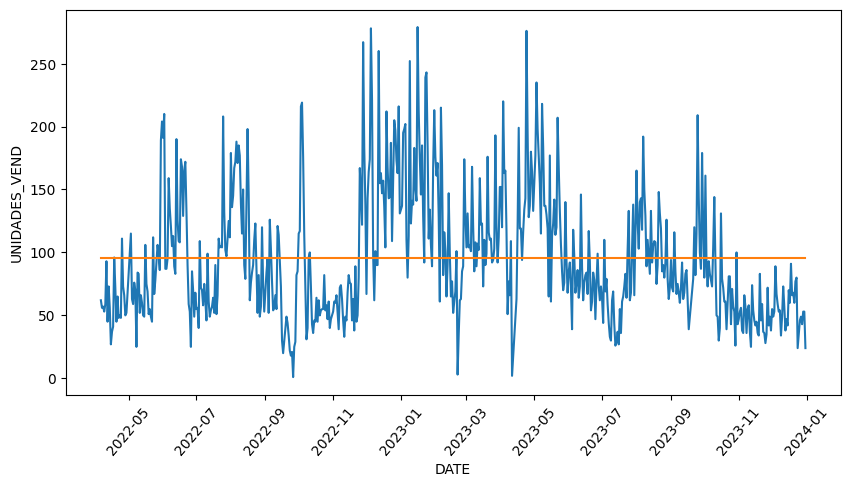

In [96]:
x = df['DATE']
y = df['UNIDADES_VEND']
fig, ax = plt.subplots(figsize=(10, 5))
sns.lineplot(x = x, y = y, data = df)
y = df['UNIDADES_PROM']
sns.lineplot(x = x, y = y, data = df)
plt.xticks(rotation=50)

* ¿Cuán bien ajusta esta estimación?

Calculemos el Error Cuadrático Medio y su raíz...

In [97]:
def RMSE(predicted, actual):
    mse = (predicted - actual)**2
    rmse = np.sqrt(mse.sum()/mse.count())
    return rmse

In [98]:
model_mean_RMSE = RMSE(df.UNIDADES_PROM, df.UNIDADES_VEND)
model_mean_RMSE

50.48926591674061

In [99]:
# Guardamos todo en un dataframe
dfResults = pd.DataFrame(columns = ["Model", "Forecast", "RMSE"])
dfResults.loc[0,"Model"] = "Mean"
dfResults.loc[0,"Forecast"] = model_mean_pred
dfResults.loc[0,"RMSE"] = model_mean_RMSE
dfResults.head()

Model   Forecast       RMSE
0  Mean  95.613269  50.489266

In [100]:
# Convertimos nuestra data almacenada en 'date' en datetime-delta, comenzando por cero
df["timeIndex"] = df.DATE - df.DATE.min()
df.head()

DATE  item_nbr          item_desc_1  UNIDADES_VEND  MES   AÑO  \
0 2022-04-06    657947  QUILQUE LAM 500 GRS             62    4  2022   
1 2022-04-07    657947  QUILQUE LAM 500 GRS             56    4  2022   
2 2022-04-08    657947  QUILQUE LAM 500 GRS             57    4  2022   
3 2022-04-09    657947  QUILQUE LAM 500 GRS             53    4  2022   
4 2022-04-10    657947  QUILQUE LAM 500 GRS             59    4  2022   

   UNIDADES_PROM timeIndex  
0      95.613269    0 days  
1      95.613269    1 days  
2      95.613269    2 days  
3      95.613269    3 days  
4      95.613269    4 days

In [101]:
# Transformamos la última columna a días con timedelta
df["timeIndex"] =  df["timeIndex"]/np.timedelta64(1, 'D')


In [102]:
# Redondeamos, quitando todos los decimales
df["timeIndex"] = df["timeIndex"].round(0).astype(int)
df.timeIndex.tail()

613    630
614    631
615    632
616    633
617    634
Name: timeIndex, dtype: int64

In [103]:
df.head()

DATE  item_nbr          item_desc_1  UNIDADES_VEND  MES   AÑO  \
0 2022-04-06    657947  QUILQUE LAM 500 GRS             62    4  2022   
1 2022-04-07    657947  QUILQUE LAM 500 GRS             56    4  2022   
2 2022-04-08    657947  QUILQUE LAM 500 GRS             57    4  2022   
3 2022-04-09    657947  QUILQUE LAM 500 GRS             53    4  2022   
4 2022-04-10    657947  QUILQUE LAM 500 GRS             59    4  2022   

   UNIDADES_PROM  timeIndex  
0      95.613269          0  
1      95.613269          1  
2      95.613269          2  
3      95.613269          3  
4      95.613269          4

In [104]:
# creamos un dataset agrupado por fecha
groupby_date = df.groupby(df.DATE)["UNIDADES_VEND"].sum()
groupby_date = pd.DataFrame(groupby_date)
groupby_date.head(10)

UNIDADES_VEND
DATE                     
2022-04-06             62
2022-04-07             56
2022-04-08             57
2022-04-09             53
2022-04-10             59
2022-04-11             93
2022-04-12             45
2022-04-13             73
2022-04-14             56
2022-04-15             27

In [105]:
groupby_date["DATE"] =groupby_date.index

In [106]:
# Convertimos nuestra data almacenada en 'date' en datetime-delta, comenzando por cero
groupby_date["timeIndex"] = groupby_date.DATE - groupby_date.DATE.min()

# Transformamos la última columna a días con timedelta
groupby_date["timeIndex"] =  groupby_date["timeIndex"]/np.timedelta64(1, 'D')

In [107]:
groupby_date.head()

UNIDADES_VEND       DATE  timeIndex
DATE                                           
2022-04-06             62 2022-04-06        0.0
2022-04-07             56 2022-04-07        1.0
2022-04-08             57 2022-04-08        2.0
2022-04-09             53 2022-04-09        3.0
2022-04-10             59 2022-04-10        4.0

In [108]:
# Redondeamos, quitando todos los decimales
groupby_date["timeIndex"] = groupby_date["timeIndex"].round(0).astype(int)
groupby_date.timeIndex.tail()

DATE
2023-12-27    630
2023-12-28    631
2023-12-29    632
2023-12-30    633
2023-12-31    634
Name: timeIndex, dtype: int64

In [109]:
# Ahora fiteamos nuestro modelo de regresión lineal entre priceMod y timeIndex
model_linear = smf.ols('UNIDADES_VEND ~ timeIndex', data = df).fit()

In [110]:
model_linear.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          UNIDADES_VEND   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     6.947
Date:                Fri, 03 May 2024   Prob (F-statistic):            0.00861
Time:                        17:40:53   Log-Likelihood:                -3297.1
No. Observations:                 618   AIC:                             6598.
Df Residuals:                     616   BIC:                             6607.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    104.8390      4.043     25.933      0.000      96.900     112.778
timeIndex     -0.0291      0.011     -2.636      0.009      -0.051      -0.007
==============================================================================
Omnibus:                       79.212   Durbin-Watson:                   0.660
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              107.401
Skew:                           0.964   Prob(JB):                     4.76e-24
Kurtosis:                       3.673   Cond. No.                         732.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [111]:
model_linear_pred = model_linear.predict()


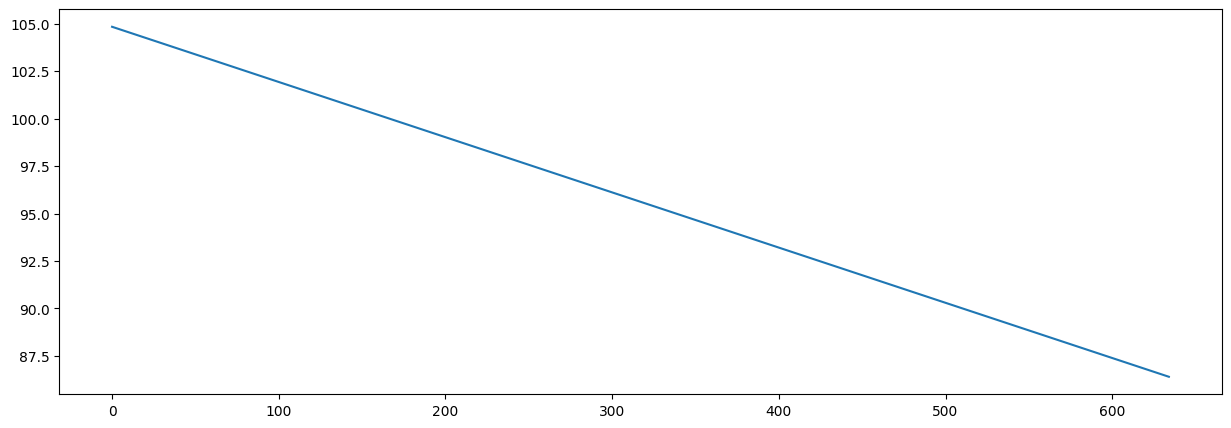

In [112]:
# Ploteamos los resultados de la predicción
plt.rcParams['figure.figsize'] = (15, 5)
#df.plot(kind="line", x="timeIndex", y = "UNIDADES_VEND")
plt.plot(df.timeIndex,model_linear_pred, '-');

In [113]:
df

DATE  item_nbr          item_desc_1  UNIDADES_VEND  MES   AÑO  \
0   2022-04-06    657947  QUILQUE LAM 500 GRS             62    4  2022   
1   2022-04-07    657947  QUILQUE LAM 500 GRS             56    4  2022   
2   2022-04-08    657947  QUILQUE LAM 500 GRS             57    4  2022   
3   2022-04-09    657947  QUILQUE LAM 500 GRS             53    4  2022   
4   2022-04-10    657947  QUILQUE LAM 500 GRS             59    4  2022   
..         ...       ...                  ...            ...  ...   ...   
613 2023-12-27    657947  QUILQUE LAM 500 GRS             49   12  2023   
614 2023-12-28    657947  QUILQUE LAM 500 GRS             43   12  2023   
615 2023-12-29    657947  QUILQUE LAM 500 GRS             53   12  2023   
616 2023-12-30    657947  QUILQUE LAM 500 GRS             53   12  2023   
617 2023-12-31    657947  QUILQUE LAM 500 GRS             24   12  2023   

     UNIDADES_PROM  timeIndex  
0        95.613269          0  
1        95.613269          1  
2        95.613269          2  
3        95.613269          3  
4        95.613269          4  
..             ...        ...  
613      95.613269        630  
614      95.613269        631  
615      95.613269        632  
616      95.613269        633  
617      95.613269        634  

[618 rows x 8 columns]

In [114]:
df["UNIDADES_Linear"] = model_linear_pred
df.head()

DATE  item_nbr          item_desc_1  UNIDADES_VEND  MES   AÑO  \
0 2022-04-06    657947  QUILQUE LAM 500 GRS             62    4  2022   
1 2022-04-07    657947  QUILQUE LAM 500 GRS             56    4  2022   
2 2022-04-08    657947  QUILQUE LAM 500 GRS             57    4  2022   
3 2022-04-09    657947  QUILQUE LAM 500 GRS             53    4  2022   
4 2022-04-10    657947  QUILQUE LAM 500 GRS             59    4  2022   

   UNIDADES_PROM  timeIndex  UNIDADES_Linear  
0      95.613269          0       104.839017  
1      95.613269          1       104.809929  
2      95.613269          2       104.780842  
3      95.613269          3       104.751755  
4      95.613269          4       104.722668

(array([19113., 19174., 19236., 19297., 19358., 19417., 19478., 19539.,
        19601., 19662., 19723.]),
 [Text(19113.0, 0, '2022-05'),
  Text(19174.0, 0, '2022-07'),
  Text(19236.0, 0, '2022-09'),
  Text(19297.0, 0, '2022-11'),
  Text(19358.0, 0, '2023-01'),
  Text(19417.0, 0, '2023-03'),
  Text(19478.0, 0, '2023-05'),
  Text(19539.0, 0, '2023-07'),
  Text(19601.0, 0, '2023-09'),
  Text(19662.0, 0, '2023-11'),
  Text(19723.0, 0, '2024-01')])

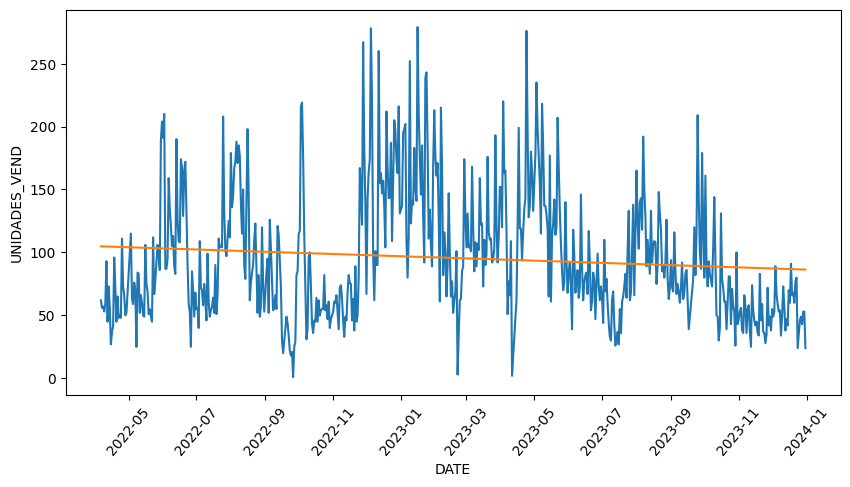

In [115]:
x = df['DATE']
y = df['UNIDADES_VEND']
fig, ax = plt.subplots(figsize=(10, 5))
sns.lineplot(x = x, y = y, data = df)
y = df['UNIDADES_Linear']
sns.lineplot(x = x, y = y, data = df)
plt.xticks(rotation=50)

In [116]:
# Root Mean Squared Error (RMSE)
model_linear_RMSE = RMSE(df.UNIDADES_Linear, df.UNIDADES_VEND)
model_linear_RMSE

50.206944927786324

In [117]:
# Añadimos estos datos a nuestro DF de resultados para comparar con el modelo anterior
dfResults.loc[1,"Model"] = "Linear"
dfResults.loc[1,"Forecast"] = model_linear_pred[-1]
dfResults.loc[1,"RMSE"] = model_linear_RMSE
dfResults.head()

Model   Forecast       RMSE
0    Mean  95.613269  50.489266
1  Linear  86.397781  50.206945

In [118]:
df['DATE'] = pd.to_datetime(df['DATE'])

In [119]:
df.set_index('DATE', inplace=True)


In [120]:
df

item_nbr          item_desc_1  UNIDADES_VEND  MES   AÑO  \
DATE                                                                  
2022-04-06    657947  QUILQUE LAM 500 GRS             62    4  2022   
2022-04-07    657947  QUILQUE LAM 500 GRS             56    4  2022   
2022-04-08    657947  QUILQUE LAM 500 GRS             57    4  2022   
2022-04-09    657947  QUILQUE LAM 500 GRS             53    4  2022   
2022-04-10    657947  QUILQUE LAM 500 GRS             59    4  2022   
...              ...                  ...            ...  ...   ...   
2023-12-27    657947  QUILQUE LAM 500 GRS             49   12  2023   
2023-12-28    657947  QUILQUE LAM 500 GRS             43   12  2023   
2023-12-29    657947  QUILQUE LAM 500 GRS             53   12  2023   
2023-12-30    657947  QUILQUE LAM 500 GRS             53   12  2023   
2023-12-31    657947  QUILQUE LAM 500 GRS             24   12  2023   

            UNIDADES_PROM  timeIndex  UNIDADES_Linear  
DATE                                                   
2022-04-06      95.613269          0       104.839017  
2022-04-07      95.613269          1       104.809929  
2022-04-08      95.613269          2       104.780842  
2022-04-09      95.613269          3       104.751755  
2022-04-10      95.613269          4       104.722668  
...                   ...        ...              ...  
2023-12-27      95.613269        630        86.514130  
2023-12-28      95.613269        631        86.485043  
2023-12-29      95.613269        632        86.455955  
2023-12-30      95.613269        633        86.426868  
2023-12-31      95.613269        634        86.397781  

[618 rows x 8 columns]

In [121]:
# Ordenar por subcategoría y fecha
df.sort_values(['DATE'], inplace=True)

# Aplicar shift para obtener unidades vendidas del día posterior
df['UNIDADES_Shift'] = df['UNIDADES_VEND'].shift(1)

df.iloc[1:200]

item_nbr          item_desc_1  UNIDADES_VEND  MES   AÑO  \
DATE                                                                  
2022-04-07    657947  QUILQUE LAM 500 GRS             56    4  2022   
2022-04-08    657947  QUILQUE LAM 500 GRS             57    4  2022   
2022-04-09    657947  QUILQUE LAM 500 GRS             53    4  2022   
2022-04-10    657947  QUILQUE LAM 500 GRS             59    4  2022   
2022-04-11    657947  QUILQUE LAM 500 GRS             93    4  2022   
...              ...                  ...            ...  ...   ...   
2022-10-24    657947  QUILQUE LAM 500 GRS             82   10  2022   
2022-10-25    657947  QUILQUE LAM 500 GRS             54   10  2022   
2022-10-26    657947  QUILQUE LAM 500 GRS             58   10  2022   
2022-10-27    657947  QUILQUE LAM 500 GRS             47   10  2022   
2022-10-28    657947  QUILQUE LAM 500 GRS             61   10  2022   

            UNIDADES_PROM  timeIndex  UNIDADES_Linear  UNIDADES_Shift  
DATE                                                                   
2022-04-07      95.613269          1       104.809929            62.0  
2022-04-08      95.613269          2       104.780842            56.0  
2022-04-09      95.613269          3       104.751755            57.0  
2022-04-10      95.613269          4       104.722668            53.0  
2022-04-11      95.613269          5       104.693581            59.0  
...                   ...        ...              ...             ...  
2022-10-24      95.613269        201        98.992505            55.0  
2022-10-25      95.613269        202        98.963418            82.0  
2022-10-26      95.613269        203        98.934331            54.0  
2022-10-27      95.613269        204        98.905244            58.0  
2022-10-28      95.613269        205        98.876157            47.0  

[199 rows x 9 columns]

In [122]:
df['UNIDADES_Shift'] = df['UNIDADES_Shift'].fillna(0)

In [123]:
df

item_nbr          item_desc_1  UNIDADES_VEND  MES   AÑO  \
DATE                                                                  
2022-04-06    657947  QUILQUE LAM 500 GRS             62    4  2022   
2022-04-07    657947  QUILQUE LAM 500 GRS             56    4  2022   
2022-04-08    657947  QUILQUE LAM 500 GRS             57    4  2022   
2022-04-09    657947  QUILQUE LAM 500 GRS             53    4  2022   
2022-04-10    657947  QUILQUE LAM 500 GRS             59    4  2022   
...              ...                  ...            ...  ...   ...   
2023-12-27    657947  QUILQUE LAM 500 GRS             49   12  2023   
2023-12-28    657947  QUILQUE LAM 500 GRS             43   12  2023   
2023-12-29    657947  QUILQUE LAM 500 GRS             53   12  2023   
2023-12-30    657947  QUILQUE LAM 500 GRS             53   12  2023   
2023-12-31    657947  QUILQUE LAM 500 GRS             24   12  2023   

            UNIDADES_PROM  timeIndex  UNIDADES_Linear  UNIDADES_Shift  
DATE                                                                   
2022-04-06      95.613269          0       104.839017             0.0  
2022-04-07      95.613269          1       104.809929            62.0  
2022-04-08      95.613269          2       104.780842            56.0  
2022-04-09      95.613269          3       104.751755            57.0  
2022-04-10      95.613269          4       104.722668            53.0  
...                   ...        ...              ...             ...  
2023-12-27      95.613269        630        86.514130            46.0  
2023-12-28      95.613269        631        86.485043            49.0  
2023-12-29      95.613269        632        86.455955            43.0  
2023-12-30      95.613269        633        86.426868            53.0  
2023-12-31      95.613269        634        86.397781            53.0  

[618 rows x 9 columns]

In [124]:
# creamos un dataset agrupado por fecha
groupby_date2 = df.groupby(df.index)["UNIDADES_VEND"].sum()
groupby_date2 = pd.DataFrame(groupby_date)
groupby_date2.head(10)

UNIDADES_VEND       DATE  timeIndex
DATE                                           
2022-04-06             62 2022-04-06          0
2022-04-07             56 2022-04-07          1
2022-04-08             57 2022-04-08          2
2022-04-09             53 2022-04-09          3
2022-04-10             59 2022-04-10          4
2022-04-11             93 2022-04-11          5
2022-04-12             45 2022-04-12          6
2022-04-13             73 2022-04-13          7
2022-04-14             56 2022-04-14          8
2022-04-15             27 2022-04-15          9

In [125]:
groupby_date2["UNIDADES_Shift"] = groupby_date2.UNIDADES_VEND.shift(periods = 1, fill_value=0)
groupby_date2.tail(10)

UNIDADES_VEND       DATE  timeIndex  UNIDADES_Shift
DATE                                                           
2023-12-21             60 2023-12-21        624              68
2023-12-22             77 2023-12-22        625              60
2023-12-23             80 2023-12-23        626              77
2023-12-24             24 2023-12-24        627              80
2023-12-26             46 2023-12-26        629              24
2023-12-27             49 2023-12-27        630              46
2023-12-28             43 2023-12-28        631              49
2023-12-29             53 2023-12-29        632              43
2023-12-30             53 2023-12-30        633              53
2023-12-31             24 2023-12-31        634              53

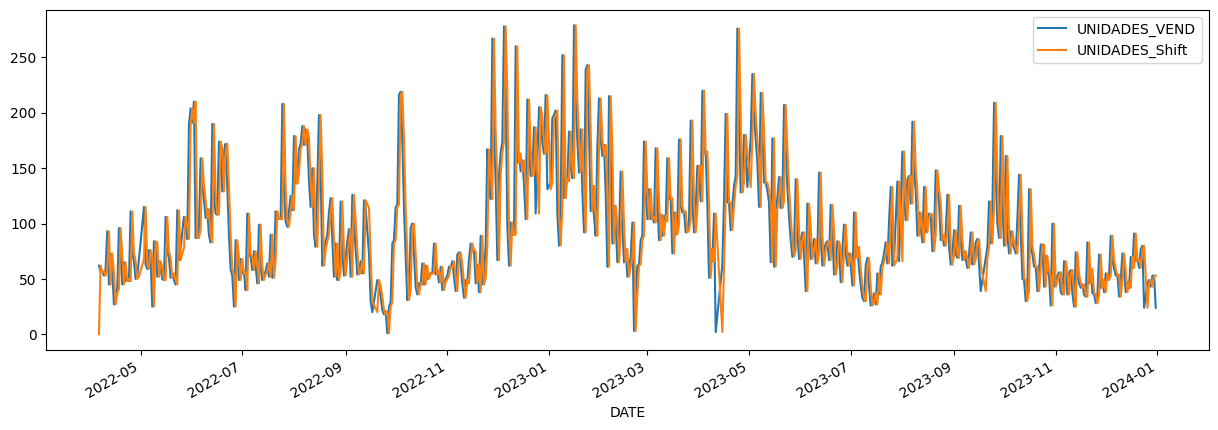

In [126]:
plt.rcParams['figure.figsize'] = (15, 5)
groupby_date.plot(kind="line", x="DATE", y = ["UNIDADES_VEND","UNIDADES_Shift"]);

(array([19113., 19174., 19236., 19297., 19358., 19417., 19478., 19539.,
        19601., 19662., 19723.]),
 [Text(19113.0, 0, '2022-05'),
  Text(19174.0, 0, '2022-07'),
  Text(19236.0, 0, '2022-09'),
  Text(19297.0, 0, '2022-11'),
  Text(19358.0, 0, '2023-01'),
  Text(19417.0, 0, '2023-03'),
  Text(19478.0, 0, '2023-05'),
  Text(19539.0, 0, '2023-07'),
  Text(19601.0, 0, '2023-09'),
  Text(19662.0, 0, '2023-11'),
  Text(19723.0, 0, '2024-01')])

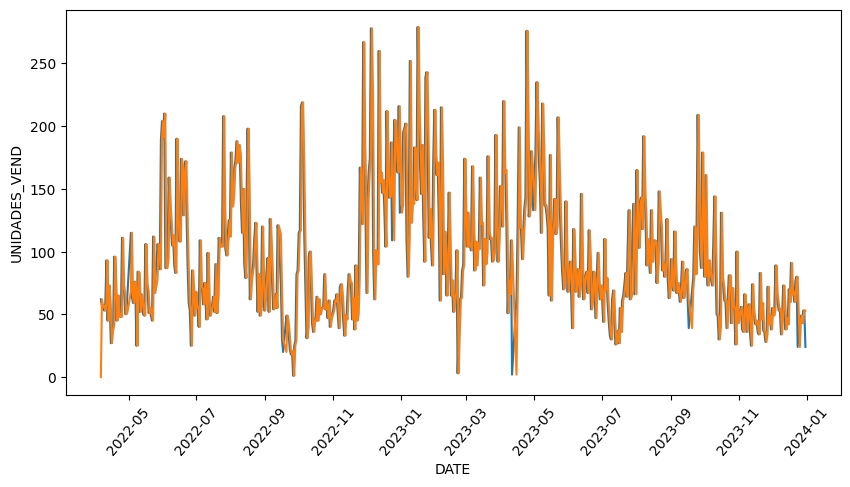

In [127]:
x = df.index
y = df['UNIDADES_VEND']
fig, ax = plt.subplots(figsize=(10, 5))
sns.lineplot(x = x, y = y, data = df)
y = df['UNIDADES_Shift']
sns.lineplot(x = x, y = y, data = df)
plt.xticks(rotation=50)

In [128]:
# Calculamos el RMSE y almacenamos los resultados
dfResults.loc[2,"Model"] = "Random"
dfResults.loc[2,"Forecast"] = df.UNIDADES_Shift[-1]
dfResults.loc[2,"RMSE"] = RMSE(df.UNIDADES_Shift, df.UNIDADES_VEND)
dfResults.head()

Model   Forecast       RMSE
0    Mean  95.613269  50.489266
1  Linear  86.397781  50.206945
2  Random       53.0  40.870701

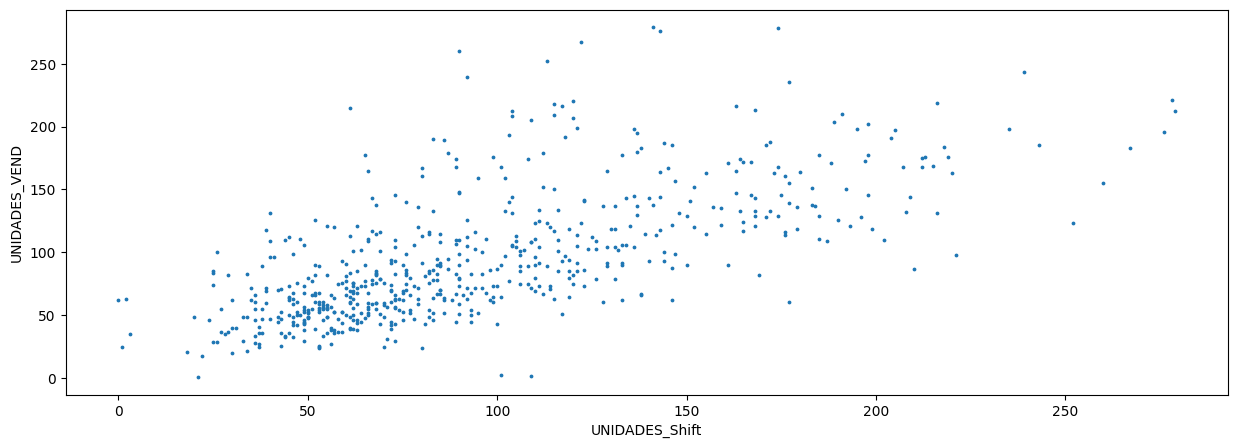

In [129]:
plt.rcParams['figure.figsize'] = (15, 5)
groupby_date.plot(kind= "scatter", y = "UNIDADES_VEND", x = "UNIDADES_Shift", s = 3);

In [130]:
df.tail()

item_nbr          item_desc_1  UNIDADES_VEND  MES   AÑO  \
DATE                                                                  
2023-12-27    657947  QUILQUE LAM 500 GRS             49   12  2023   
2023-12-28    657947  QUILQUE LAM 500 GRS             43   12  2023   
2023-12-29    657947  QUILQUE LAM 500 GRS             53   12  2023   
2023-12-30    657947  QUILQUE LAM 500 GRS             53   12  2023   
2023-12-31    657947  QUILQUE LAM 500 GRS             24   12  2023   

            UNIDADES_PROM  timeIndex  UNIDADES_Linear  UNIDADES_Shift  
DATE                                                                   
2023-12-27      95.613269        630        86.514130            46.0  
2023-12-28      95.613269        631        86.485043            49.0  
2023-12-29      95.613269        632        86.455955            43.0  
2023-12-30      95.613269        633        86.426868            53.0  
2023-12-31      95.613269        634        86.397781            53.0

In [131]:
# Calculamos la media móvil de 3 días para suavizar los valores y ploteamos
df['UNIDADES_VEND3d'] = df.UNIDADES_VEND.rolling(window = '3d' ).mean()
df.head(793)

item_nbr          item_desc_1  UNIDADES_VEND  MES   AÑO  \
DATE                                                                  
2022-04-06    657947  QUILQUE LAM 500 GRS             62    4  2022   
2022-04-07    657947  QUILQUE LAM 500 GRS             56    4  2022   
2022-04-08    657947  QUILQUE LAM 500 GRS             57    4  2022   
2022-04-09    657947  QUILQUE LAM 500 GRS             53    4  2022   
2022-04-10    657947  QUILQUE LAM 500 GRS             59    4  2022   
...              ...                  ...            ...  ...   ...   
2023-12-27    657947  QUILQUE LAM 500 GRS             49   12  2023   
2023-12-28    657947  QUILQUE LAM 500 GRS             43   12  2023   
2023-12-29    657947  QUILQUE LAM 500 GRS             53   12  2023   
2023-12-30    657947  QUILQUE LAM 500 GRS             53   12  2023   
2023-12-31    657947  QUILQUE LAM 500 GRS             24   12  2023   

            UNIDADES_PROM  timeIndex  UNIDADES_Linear  UNIDADES_Shift  \
DATE                                                                    
2022-04-06      95.613269          0       104.839017             0.0   
2022-04-07      95.613269          1       104.809929            62.0   
2022-04-08      95.613269          2       104.780842            56.0   
2022-04-09      95.613269          3       104.751755            57.0   
2022-04-10      95.613269          4       104.722668            53.0   
...                   ...        ...              ...             ...   
2023-12-27      95.613269        630        86.514130            46.0   
2023-12-28      95.613269        631        86.485043            49.0   
2023-12-29      95.613269        632        86.455955            43.0   
2023-12-30      95.613269        633        86.426868            53.0   
2023-12-31      95.613269        634        86.397781            53.0   

            UNIDADES_VEND3d  
DATE                         
2022-04-06        62.000000  
2022-04-07        59.000000  
2022-04-08        58.333333  
2022-04-09        55.333333  
2022-04-10        56.333333  
...                     ...  
2023-12-27        47.500000  
2023-12-28        46.000000  
2023-12-29        48.333333  
2023-12-30        49.666667  
2023-12-31        43.333333  

[618 rows x 10 columns]

(array([19113., 19174., 19236., 19297., 19358., 19417., 19478., 19539.,
        19601., 19662., 19723.]),
 [Text(19113.0, 0, '2022-05'),
  Text(19174.0, 0, '2022-07'),
  Text(19236.0, 0, '2022-09'),
  Text(19297.0, 0, '2022-11'),
  Text(19358.0, 0, '2023-01'),
  Text(19417.0, 0, '2023-03'),
  Text(19478.0, 0, '2023-05'),
  Text(19539.0, 0, '2023-07'),
  Text(19601.0, 0, '2023-09'),
  Text(19662.0, 0, '2023-11'),
  Text(19723.0, 0, '2024-01')])

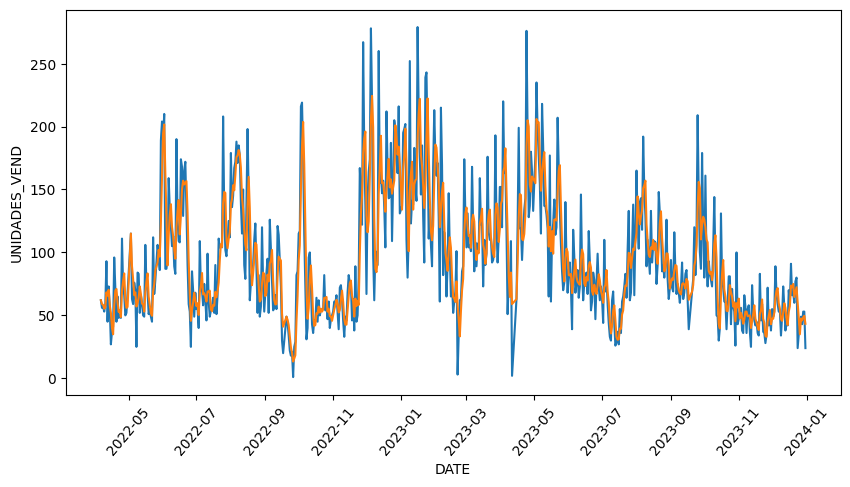

In [132]:
x = df.index
y = df['UNIDADES_VEND']
fig, ax = plt.subplots(figsize=(10, 5))
sns.lineplot(x = x, y = y, data = df)
y = df['UNIDADES_VEND3d']
sns.lineplot(x = x, y = y, data = df)
plt.xticks(rotation=50)

In [133]:
# Calculamos el RMSE y almacenamos los resultados
dfResults.loc[3,"Model"] = "Moving Average 3d"
dfResults.loc[3,"Forecast"] = df.UNIDADES_VEND3d[-1]
dfResults.loc[3,"RMSE"] = RMSE(df.UNIDADES_VEND3d, df.UNIDADES_VEND)
dfResults.head()

Model   Forecast       RMSE
0               Mean  95.613269  50.489266
1             Linear  86.397781  50.206945
2             Random       53.0  40.870701
3  Moving Average 3d  43.333333  26.501421

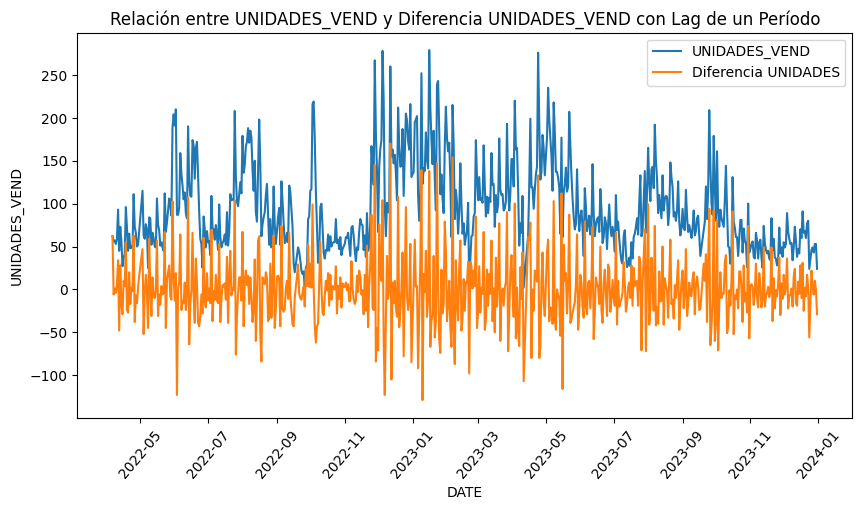

In [134]:
# Crear la columna de diferencias
df["UNIDADES_Diff"] = df.UNIDADES_VEND - df.UNIDADES_Shift

# Crear el gráfico de líneas
x = df.index
y1 = df['UNIDADES_VEND']
y2 = df['UNIDADES_Diff']

fig, ax = plt.subplots(figsize=(10, 5))

# Plotear las series de tiempo
sns.lineplot(x=x, y=y1, data=df, label='UNIDADES_VEND')
sns.lineplot(x=x, y=y2, data=df, label='Diferencia UNIDADES')

# Añadir título
plt.title('Relación entre UNIDADES_VEND y Diferencia UNIDADES_VEND con Lag de un Período')

# Rotar las etiquetas del eje x para mejor legibilidad
plt.xticks(rotation=50)

# Mostrar la leyenda
plt.legend()

# Mostrar el gráfico
plt.show()

In [135]:
ts = df.UNIDADES_VEND
ts_diff = df.UNIDADES_Diff
ts_diff.dropna(inplace = True)

In [136]:
# Importamos plots ACF y PACF
from statsmodels.tsa.stattools import acf, pacf

In [137]:
lag_acf = acf(ts_diff, nlags=50)
lag_acf

array([ 1.        , -0.2799578 , -0.19502756,  0.0075457 ,  0.07473895,
       -0.15738558, -0.12797869,  0.42540271, -0.14073917, -0.0735901 ,
       -0.02378015,  0.04926486, -0.13684772, -0.03573485,  0.29113888,
       -0.12933639, -0.05660319,  0.04219774, -0.0126505 , -0.07063735,
        0.0040253 ,  0.23318509, -0.11544592, -0.09319166,  0.00473856,
        0.02358292, -0.0134436 , -0.04431075,  0.1948827 , -0.08359776,
       -0.08469004,  0.01605035, -0.04037955,  0.05458254, -0.01659318,
        0.1758537 , -0.13006603, -0.06363905,  0.01086059, -0.04709486,
        0.08247543, -0.04105404,  0.12332332, -0.07949964, -0.08161636,
        0.01131427, -0.01605887,  0.10794539, -0.06485618,  0.13678538,
       -0.06012072])

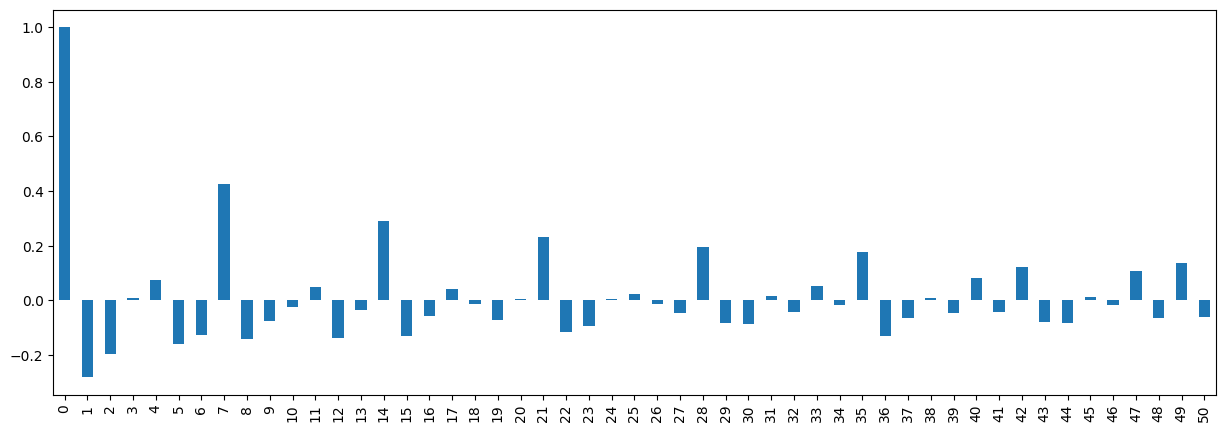

In [138]:
ACF = pd.Series(lag_acf)
ACF.plot(kind = "bar");

In [139]:
lag_pacf = pacf(ts_diff, nlags=50, method='ols');

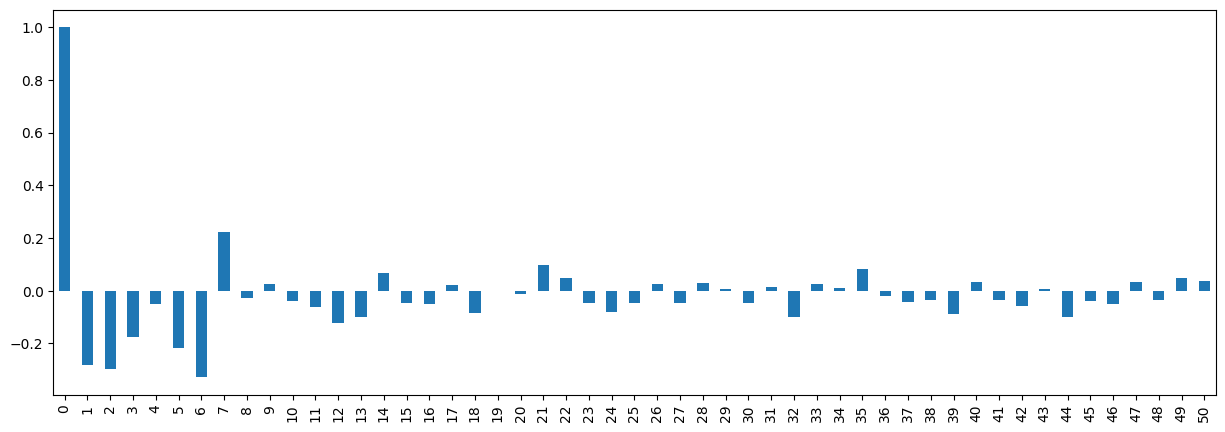

In [140]:
PACF = pd.Series(lag_pacf)
PACF.plot(kind = "bar");

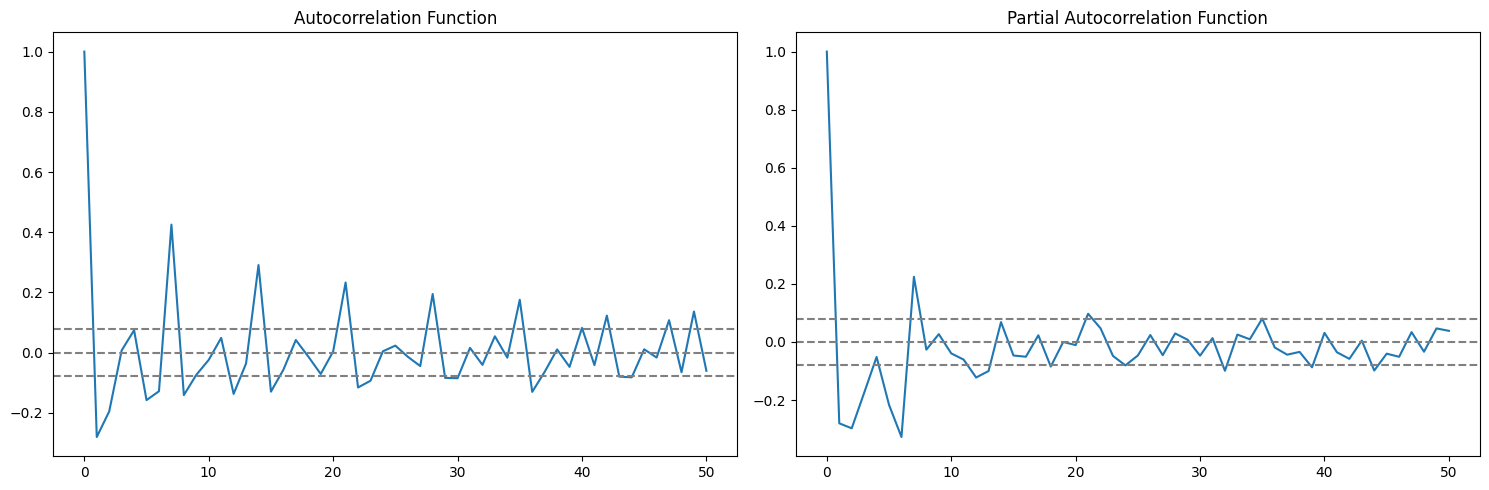

In [141]:
# Veamos qué parámetros son significativamente distintos de cero

#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

In [142]:
import statsmodels.api as sm
ts.head()

DATE
2022-04-06    62
2022-04-07    56
2022-04-08    57
2022-04-09    53
2022-04-10    59
Name: UNIDADES_VEND, dtype: int64

In [143]:
# Instancio el modelo con parámetros (p=1,d=0,q=1) según el análisis de ACF y PACF
# En este caso d=0 porque trabajamos directamente con las diferencias
model_AR1MA = sm.tsa.arima.ARIMA(ts_diff, order=(7,0,7))

# Fiteo el modelo
results_ARIMA = model_AR1MA.fit()
results_ARIMA.fittedvalues.head()

/Users/ronaldverdugol/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/ronaldverdugol/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/ronaldverdugol/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/ronaldverdugol/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  war

DATE
2022-04-06    -0.019417
2022-04-07   -18.634960
2022-04-08   -16.193904
2022-04-09    -9.223634
2022-04-10     1.088692
dtype: float64

In [144]:
print(results_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:          UNIDADES_Diff   No. Observations:                  618
Model:                 ARIMA(7, 0, 7)   Log Likelihood               -3018.350
Date:                Fri, 03 May 2024   AIC                           6068.699
Time:                        17:41:19   BIC                           6139.523
Sample:                             0   HQIC                          6096.233
                                - 618                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0194      0.434     -0.045      0.964      -0.870       0.831
ar.L1         -0.5052      0.094     -5.379      0.000      -0.689      -0.321
ar.L2         -0.5144      0.094     -5.449      0.0

(array([19113., 19174., 19236., 19297., 19358., 19417., 19478., 19539.,
        19601., 19662., 19723.]),
 [Text(19113.0, 0, '2022-05'),
  Text(19174.0, 0, '2022-07'),
  Text(19236.0, 0, '2022-09'),
  Text(19297.0, 0, '2022-11'),
  Text(19358.0, 0, '2023-01'),
  Text(19417.0, 0, '2023-03'),
  Text(19478.0, 0, '2023-05'),
  Text(19539.0, 0, '2023-07'),
  Text(19601.0, 0, '2023-09'),
  Text(19662.0, 0, '2023-11'),
  Text(19723.0, 0, '2024-01')])

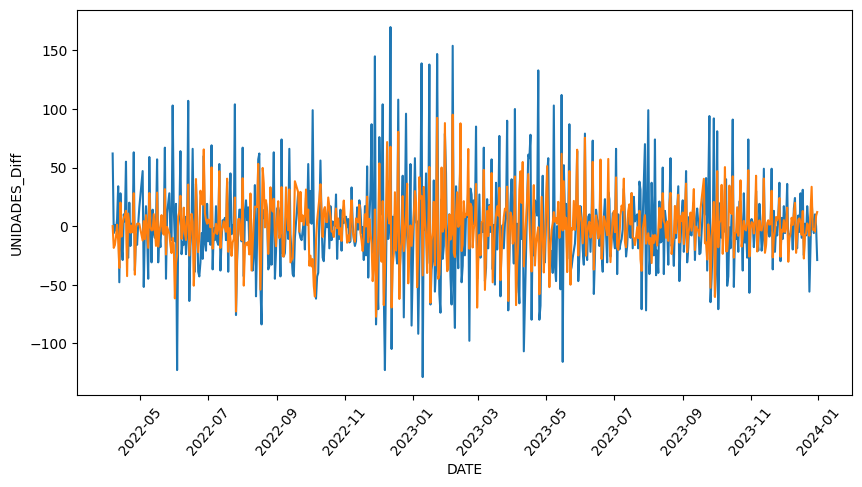

In [145]:
x = df.index
y = ts_diff
fig, ax = plt.subplots(figsize=(10, 5))
sns.lineplot(x = x, y = y, data = df)
y = results_ARIMA.fittedvalues
sns.lineplot(x = x, y = y, data = df)
plt.xticks(rotation=50)

In [146]:
df.head()

item_nbr          item_desc_1  UNIDADES_VEND  MES   AÑO  \
DATE                                                                  
2022-04-06    657947  QUILQUE LAM 500 GRS             62    4  2022   
2022-04-07    657947  QUILQUE LAM 500 GRS             56    4  2022   
2022-04-08    657947  QUILQUE LAM 500 GRS             57    4  2022   
2022-04-09    657947  QUILQUE LAM 500 GRS             53    4  2022   
2022-04-10    657947  QUILQUE LAM 500 GRS             59    4  2022   

            UNIDADES_PROM  timeIndex  UNIDADES_Linear  UNIDADES_Shift  \
DATE                                                                    
2022-04-06      95.613269          0       104.839017             0.0   
2022-04-07      95.613269          1       104.809929            62.0   
2022-04-08      95.613269          2       104.780842            56.0   
2022-04-09      95.613269          3       104.751755            57.0   
2022-04-10      95.613269          4       104.722668            53.0   

            UNIDADES_VEND3d  UNIDADES_Diff  
DATE                                        
2022-04-06        62.000000           62.0  
2022-04-07        59.000000           -6.0  
2022-04-08        58.333333            1.0  
2022-04-09        55.333333           -4.0  
2022-04-10        56.333333            6.0

In [147]:
ts_diff.sum()

24.0

In [148]:
df['predictions_ARIMA_diff'] = pd.Series(results_ARIMA.fittedvalues, copy=True)
df.predictions_ARIMA_diff.head()

DATE
2022-04-06    -0.019417
2022-04-07   -18.634960
2022-04-08   -16.193904
2022-04-09    -9.223634
2022-04-10     1.088692
Name: predictions_ARIMA_diff, dtype: float64

In [149]:
df.tail()

item_nbr          item_desc_1  UNIDADES_VEND  MES   AÑO  \
DATE                                                                  
2023-12-27    657947  QUILQUE LAM 500 GRS             49   12  2023   
2023-12-28    657947  QUILQUE LAM 500 GRS             43   12  2023   
2023-12-29    657947  QUILQUE LAM 500 GRS             53   12  2023   
2023-12-30    657947  QUILQUE LAM 500 GRS             53   12  2023   
2023-12-31    657947  QUILQUE LAM 500 GRS             24   12  2023   

            UNIDADES_PROM  timeIndex  UNIDADES_Linear  UNIDADES_Shift  \
DATE                                                                    
2023-12-27      95.613269        630        86.514130            46.0   
2023-12-28      95.613269        631        86.485043            49.0   
2023-12-29      95.613269        632        86.455955            43.0   
2023-12-30      95.613269        633        86.426868            53.0   
2023-12-31      95.613269        634        86.397781            53.0   

            UNIDADES_VEND3d  UNIDADES_Diff  predictions_ARIMA_diff  
DATE                                                                
2023-12-27        47.500000            3.0               -3.065432  
2023-12-28        46.000000           -6.0               -2.564217  
2023-12-29        48.333333           10.0               -4.787249  
2023-12-30        49.666667            0.0                8.681199  
2023-12-31        43.333333          -29.0               11.990561

In [150]:
ts_diff.head()

DATE
2022-04-06    62.0
2022-04-07    -6.0
2022-04-08     1.0
2022-04-09    -4.0
2022-04-10     6.0
Name: UNIDADES_Diff, dtype: float64

In [151]:
predictions_ARIMA_diff = df.predictions_ARIMA_diff
predictions_ARIMA_diff.tail()

DATE
2023-12-27    -3.065432
2023-12-28    -2.564217
2023-12-29    -4.787249
2023-12-30     8.681199
2023-12-31    11.990561
Name: predictions_ARIMA_diff, dtype: float64

In [152]:
ts.iloc[0]

62

In [153]:
predictions_ARIMA = pd.Series(ts.iloc[0], index=ts.index)
predictions_ARIMA = predictions_ARIMA.add(predictions_ARIMA_diff,fill_value=0)
predictions_ARIMA.tail()

DATE
2023-12-27    58.934568
2023-12-28    59.435783
2023-12-29    57.212751
2023-12-30    70.681199
2023-12-31    73.990561
dtype: float64

In [154]:
# Guardamos nuestros resultados
df['UNIDADES_ARIMA'] = predictions_ARIMA

In [155]:
df['UNIDADES_ARIMA'].tail

<bound method NDFrame.tail of DATE
2022-04-06    61.980583
2022-04-07    43.365040
2022-04-08    45.806096
2022-04-09    52.776366
2022-04-10    63.088692
                ...    
2023-12-27    58.934568
2023-12-28    59.435783
2023-12-29    57.212751
2023-12-30    70.681199
2023-12-31    73.990561
Name: UNIDADES_ARIMA, Length: 618, dtype: float64>

In [156]:
df['UNIDADES_VEND'].tail

<bound method NDFrame.tail of DATE
2022-04-06    62
2022-04-07    56
2022-04-08    57
2022-04-09    53
2022-04-10    59
              ..
2023-12-27    49
2023-12-28    43
2023-12-29    53
2023-12-30    53
2023-12-31    24
Name: UNIDADES_VEND, Length: 618, dtype: int64>

In [157]:
# Incorporamos estimaciones y resultados a nuestro DF
dfResults.loc[4,"Model"] = "ARIMA"
dfResults.loc[4,"Forecast"] = df.UNIDADES_ARIMA[-1]
dfResults.loc[4,"RMSE"] = RMSE(df.predictions_ARIMA_diff, df.UNIDADES_Diff)



In [158]:
dfResults[["Model","RMSE"]]


Model       RMSE
0               Mean  50.489266
1             Linear  50.206945
2             Random  40.870701
3  Moving Average 3d  26.501421
4              ARIMA  31.944464

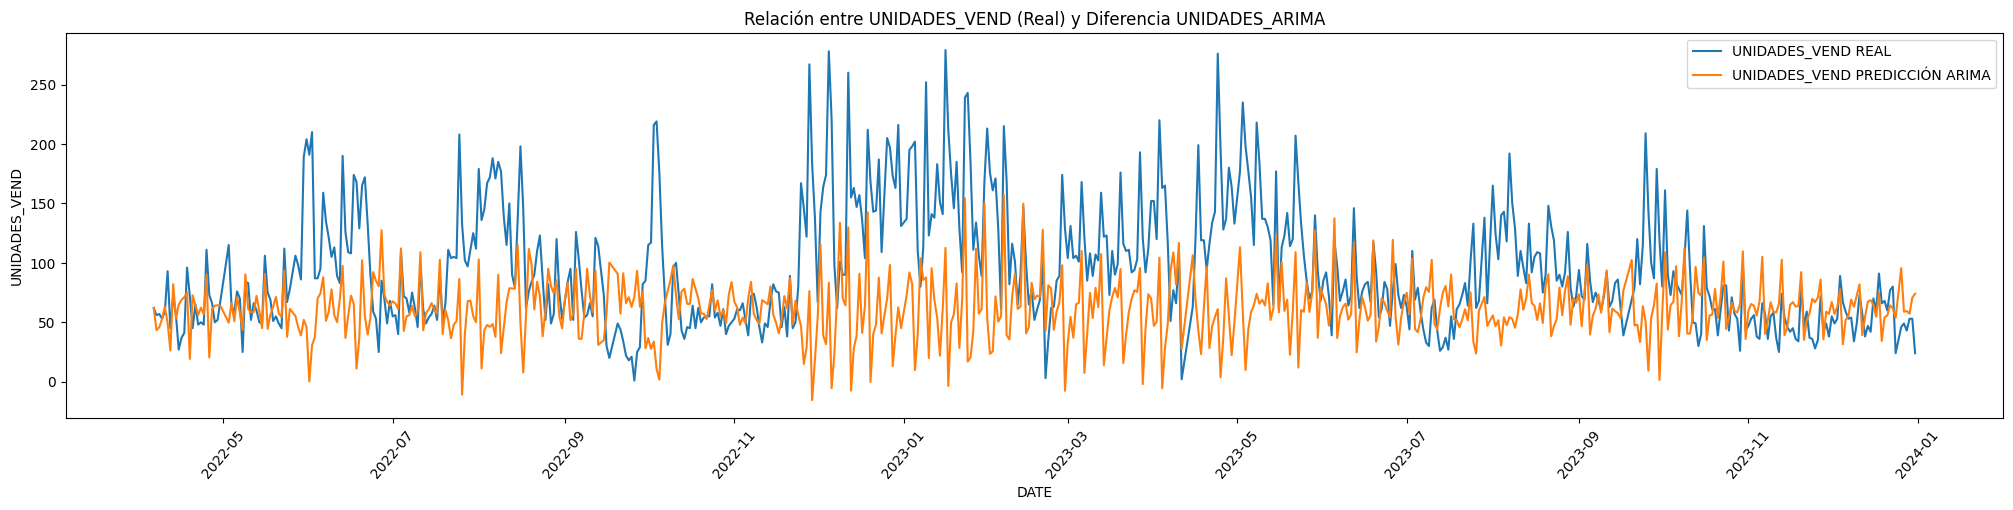

In [159]:

# Crear el gráfico de líneas
x = df.index
y1 = df['UNIDADES_VEND']
y2 = df['UNIDADES_ARIMA']

fig, ax = plt.subplots(figsize=(25, 5))

# Plotear las series de tiempo
sns.lineplot(x=x, y=y1, data=df, label='UNIDADES_VEND REAL')
sns.lineplot(x=x, y=y2, data=df, label='UNIDADES_VEND PREDICCIÓN ARIMA')

# Añadir título
plt.title('Relación entre UNIDADES_VEND (Real) y Diferencia UNIDADES_ARIMA')

# Rotar las etiquetas del eje x para mejor legibilidad
plt.xticks(rotation=50)

# Mostrar la leyenda
plt.legend()

# Mostrar el gráfico
plt.show()

In [160]:
#df = df_bkp
#df = df.dropna()

In [161]:
df.shape

(618, 13)